# Exploratory Data Analysis (EDA) 

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Show plots inline
%matplotlib inline

In [122]:
# load clearned training and testing datasets
df_train = pd.read_csv('df_train_cleaned.csv')
df_test = pd.read_csv('df_test_cleaned.csv')

In [123]:
df_train.shape

(1460, 75)

In [124]:
df_test.shape

(1459, 74)

# 1. Clean Up Missing Values

In [125]:
# only show columns with missing values of Train data
print("Train data_columns with missing values")
pd.set_option('display.max_rows', None)
train_missing = pd.concat([df_train.isna().sum(), 100 * df_train.isna().mean()], axis=1)
train_missing.columns=['count', '%']
train_missing = train_missing[train_missing['count'] > 0]
train_missing.sort_values(by='count')

Train data_columns with missing values


,count,%
Electrical,1,0.068493
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtFinType1,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


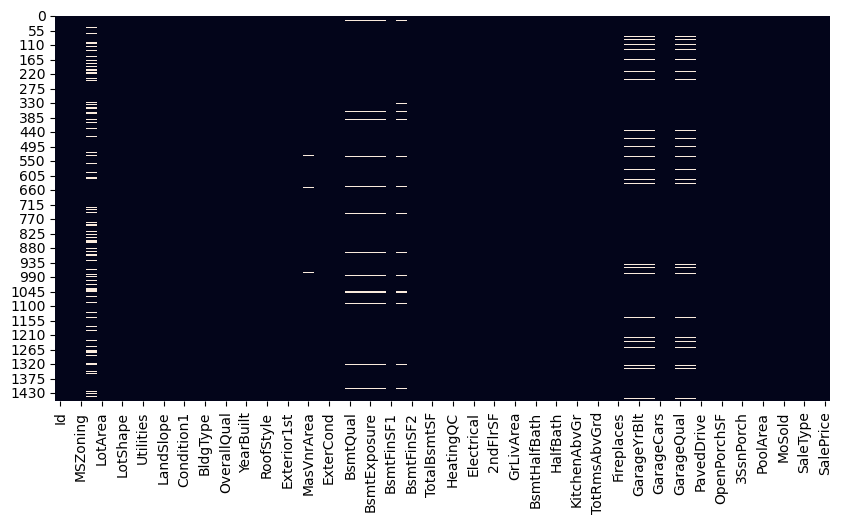

In [126]:
# display the missing value distribution in train data
plt.figure(figsize=(10, 5))
sns.heatmap(df_train.isnull(), cbar=False)
plt.xticks(rotation=90)
plt.show()

In [127]:
# only show columns with missing values of Test data
print("Test data_columns with missing values")
pd.set_option('display.max_rows', None)
test_missing = pd.concat([df_test.isna().sum(), 100 * df_test.isna().mean()], axis=1)
test_missing.columns=['count', '%']
test_missing = test_missing[test_missing['count'] > 0]
test_missing.sort_values(by='count')

Test data_columns with missing values


,count,%
BsmtUnfSF,1,0.068540
GarageArea,1,0.068540
GarageCars,1,0.068540
KitchenQual,1,0.068540
TotalBsmtSF,1,0.068540
BsmtFinSF2,1,0.068540
BsmtFinSF1,1,0.068540
SaleType,1,0.068540
Exterior1st,1,0.068540
Exterior2nd,1,0.068540


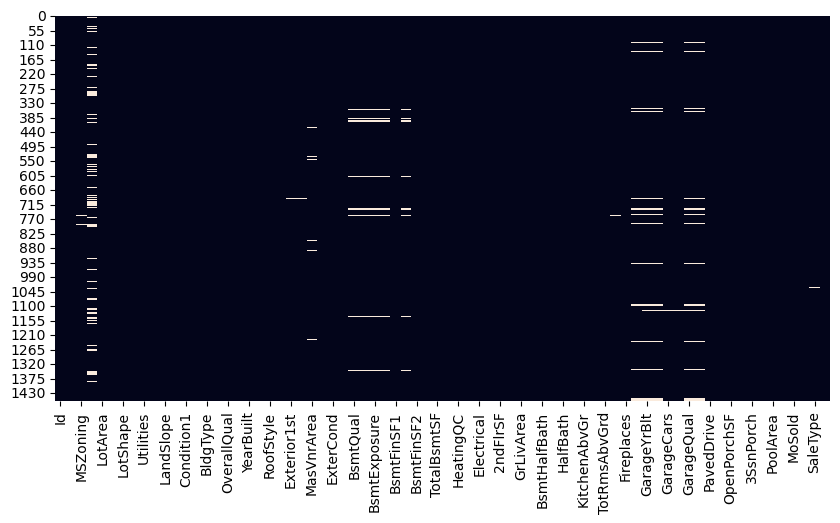

In [128]:
# display the missing value distribution in test data
plt.figure(figsize=(10, 5))
sns.heatmap(df_test.isnull(), cbar=False)
plt.xticks(rotation=90)
plt.show()

### 1.1 Drop rows with missing values accounting for less than 5% of the total records

In [129]:
# Drop missing values with less than 5% of total values
train_cols_to_drop = df_train.columns[df_train.isna().mean() <= 0.05]
print(train_cols_to_drop)
print(len(train_cols_to_drop))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
 

In [130]:
df_train.dropna(subset=train_cols_to_drop, inplace=True)

In [131]:
df_train.shape

(1412, 75)

In [132]:
df_test.shape

(1459, 74)

In [133]:
# only show columns with missing values after dropping values <5%
print("train data columns with missing values after dropping <5% missing values")
pd.set_option('display.max_rows', None)
train_missing = pd.concat([df_train.isna().sum(), 100 * df_train.isna().mean()], axis=1)
train_missing.columns=['count', '%']
train_missing = train_missing[train_missing['count'] > 0]
train_missing.sort_values(by='count')

train data columns with missing values after dropping <5% missing values


,count,%
GarageType,74,5.240793
GarageYrBlt,74,5.240793
GarageFinish,74,5.240793
GarageQual,74,5.240793
GarageCond,74,5.240793
LotFrontage,251,17.776204


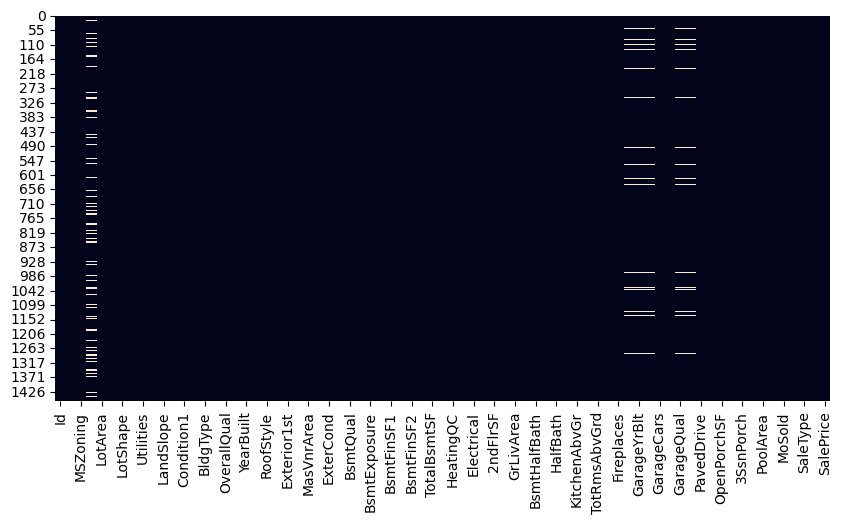

In [134]:
# display the missing value distribution in cleaned train data
plt.figure(figsize=(10, 5))
sns.heatmap(df_train.isnull(), cbar=False)
plt.xticks(rotation=90)
plt.show()

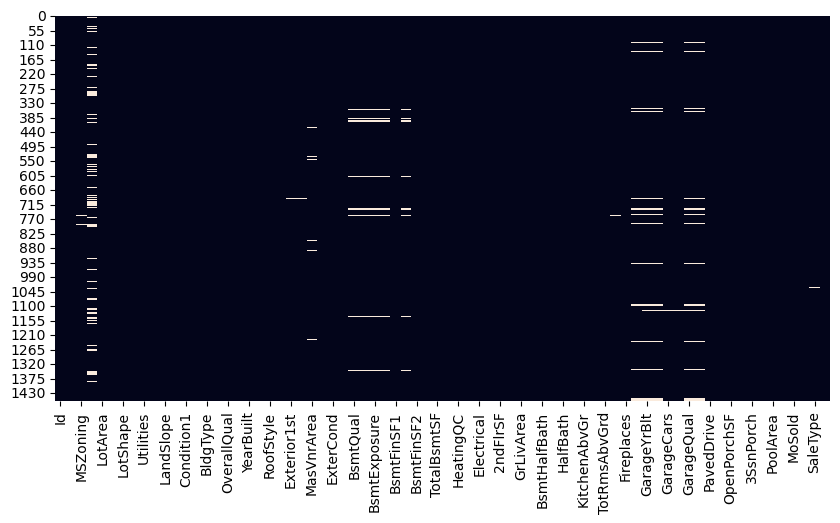

In [135]:
# display the missing value distribution in cleaned test data
plt.figure(figsize=(10, 5))
sns.heatmap(df_test.isnull(), cbar=False)
plt.xticks(rotation=90)
plt.show()

In [136]:
df_test.shape

(1459, 74)

After removing records with null values, which accounts for less than 5% of the data, the distribution of remaining missing values in both test and train datasets shows a consistent pattern. Specifically, the missing values in five garage-related variables--GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond--occur in the same group of records. The proportion of these missing values is now either below 5% in test dataset or slightly above the 5% threshold--our established criterion for dropping data--but remains below 6% in train dataset. Given this, it is reasonable to drop these records, as this approach is both simpler and more practical than imputing values for each variable indiviually. 

### 1.2 Remove missing values in five garage-related variables: GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond

In [137]:
# Create list containing columns names of five garage-related variables
five_gar_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

# Drop missing values in train and test dataset
df_train.dropna(subset=five_gar_cols, inplace=True)

In [138]:
# only show columns with missing values in train dataset after dropping missing values in five garage-related variables
print("train data columns with missing values after dropping missing values in five garage-related variables")
pd.set_option('display.max_rows', None)
train_missing = pd.concat([df_train.isna().sum(), 100 * df_train.isna().mean()], axis=1)
train_missing.columns=['count', '%']
train_missing = train_missing[train_missing['count'] > 0]
train_missing.sort_values(by='count')

train data columns with missing values after dropping missing values in five garage-related variables


,count,%
LotFrontage,244,18.236173


In [139]:
df_train.shape

(1338, 75)

The two steps of removing missing values result in the deletion of 122 records from the train dataset, accounting for 8.4% of the total. The LotFrontage column is the only variable with missing values, which account for 18% of the total records in training datasets. Next, I will find the most related variable to LotFrontage from the other 72 variables and use it for missing value imputation.

### 1.3 Imput missing values in the LotFrontage variable with prediction values.

In [140]:
print("The LotFrontage column information in the train dataset\n")
dtype = df_train['LotFrontage'].dtype
top_5_values = (
        df_train['LotFrontage']
        .dropna()
        .value_counts().
        head(5)
        )
missing_count = df_train['LotFrontage'].isna().sum()
print(f"LotFrontage Dtype: {dtype}")
print(f"Top 5 most common non-null values: \n{top_5_values}")
print(f"Missing Count: {missing_count}\n")

The LotFrontage column information in the train dataset

LotFrontage Dtype: float64
Top 5 most common non-null values: 
LotFrontage
60.0    120
80.0     67
70.0     63
75.0     50
50.0     49
Name: count, dtype: int64
Missing Count: 244



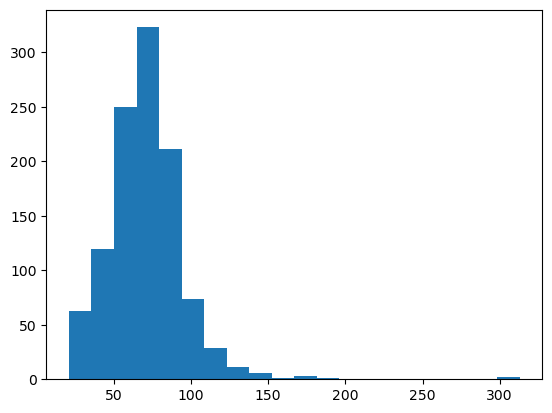

In [141]:
plt.hist(df_train['LotFrontage'].dropna(), bins=20)
plt.show()

In [142]:
corr_matrix = df_train.select_dtypes(include=['int64', 'float64']). dropna().corr()
# Get absolute correlation values with LotFrontage (excluding itself)
lotfrontage_corr = corr_matrix['LotFrontage'].drop('LotFrontage').abs()

# Find the most correlated variable
most_related_variable = lotfrontage_corr.idxmax()
highest_corr_value = lotfrontage_corr.max()

print(f'Most correlated variable: {most_related_variable} (Correlation:{highest_corr_value})')

Most correlated variable: 1stFlrSF (Correlation:0.45303513653263955)


The optimal imputation strategy depends on the distribution of LotFrontage and its relationship with 1stFlrSF. While LotFrontage exhibits a strong single mode, its moderate correlation with 1stFlrSF (0.453) suggests that predictive imputation is preferable. This approach preserves data variability while ensuring consistency with existing values.

In [143]:
from sklearn.linear_model import LinearRegression

# Prepare data
df_train_non_missing = df_train.dropna(subset=["LotFrontage"])
df_train_missing = df_train[df_train["LotFrontage"].isnull()]

# Train regression model
X_train = df_train_non_missing[["1stFlrSF"]]
y_train = df_train_non_missing["LotFrontage"]

model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
X_missing = df_train_missing[["1stFlrSF"]]
df_train_predicted_values = model.predict(X_missing)

# Fill missing values
df_train.loc[df_train["LotFrontage"].isnull(), "LotFrontage"] = df_train_predicted_values


In [144]:
df_train["LotFrontage"].isna().sum()

0

In [145]:
print("The LotFrontage column information in the test dataset\n")
dtype = df_test['LotFrontage'].dtype
top_5_values = (
        df_test['LotFrontage']
        .dropna()
        .value_counts().
        head(5)
        )
missing_count = df_test['LotFrontage'].isna().sum()
print(f"LotFrontage Dtype: {dtype}")
print(f"Top 5 most common non-null values: \n{top_5_values}")
print(f"Missing Count: {missing_count}\n")

The LotFrontage column information in the test dataset

LotFrontage Dtype: float64
Top 5 most common non-null values: 
LotFrontage
60.0    133
80.0     68
70.0     63
50.0     60
75.0     52
Name: count, dtype: int64
Missing Count: 227



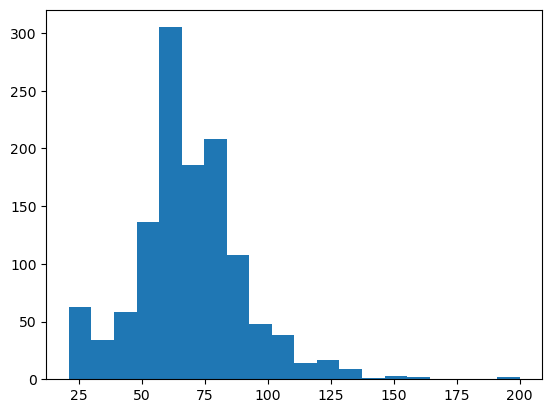

In [146]:
plt.hist(df_test['LotFrontage'].dropna(), bins=20)
plt.show()

In [147]:
from sklearn.linear_model import LinearRegression

# Prepare data
df_test_missing = df_test[df_test["LotFrontage"].isnull()]

# Predict missing values
X_missing = df_test_missing[["1stFlrSF"]]
df_test_predicted_values = model.predict(X_missing)

# Fill missing values
df_test.loc[df_test["LotFrontage"].isnull(), "LotFrontage"] = df_test_predicted_values

In [148]:
df_test['LotFrontage'].isna().sum()

0

In [149]:
# only show columns with missing values of Train data
print("Train data columns with missing values")
pd.set_option('display.max_rows', None)
train_missing = pd.concat([df_train.isna().sum(), 100 * df_train.isna().mean()], axis=1)
train_missing.columns=['count', '%']
train_missing = train_missing[train_missing['count'] > 0]
train_missing.sort_values(by='count')


Train data columns with missing values


,count,%


In [150]:
df_train.shape

(1338, 75)

In [151]:
df_test.shape

(1459, 74)

All missing data in both the test and train datasets have now been addressed. 

# 2. Categorical Variables

In [152]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotFrontage    1338 non-null   float64
 4   LotArea        1338 non-null   int64  
 5   Street         1338 non-null   object 
 6   LotShape       1338 non-null   object 
 7   LandContour    1338 non-null   object 
 8   Utilities      1338 non-null   object 
 9   LotConfig      1338 non-null   object 
 10  LandSlope      1338 non-null   object 
 11  Neighborhood   1338 non-null   object 
 12  Condition1     1338 non-null   object 
 13  Condition2     1338 non-null   object 
 14  BldgType       1338 non-null   object 
 15  HouseStyle     1338 non-null   object 
 16  OverallQual    1338 non-null   int64  
 17  OverallCond    1338 non-null   int64  
 18  YearBuilt    

### 2.1 Drop Categorical Variables with extremely skewed distributions and Combine Rare Catergories

MSSubClass is a unique numeric variable, although it is encoded as numbers, it represents categories (nominal data). It should be One-Hot encoded.  

In [153]:
df_train['MSSubClass'] = df_train['MSSubClass'].astype('category')
df_test['MSSubClass'] = df_test['MSSubClass'].astype('category')

In [154]:
categorical_vars = df_train.select_dtypes(include=['object', 'category']).columns
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns
print(f"Total categorical variables: {len(categorical_vars)}")
print(f"Total numeric variables: {len(numeric_vars)}")

Total categorical variables: 38
Total numeric variables: 37


In [155]:
for col in categorical_vars:
    print(f"\nColumn: {col}")
    print(df_train[col].value_counts())
    print(f"Unique count: {df_train[col].nunique()}")


Column: MSSubClass
MSSubClass
20     502
60     294
50     129
120     86
160     61
70      57
80      57
30      51
90      28
190     21
85      19
75      14
45       9
180      6
40       4
Name: count, dtype: int64
Unique count: 15

Column: MSZoning
MSZoning
RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: count, dtype: int64
Unique count: 5

Column: Street
Street
Pave    1333
Grvl       5
Name: count, dtype: int64
Unique count: 2

Column: LotShape
LotShape
Reg    829
IR1    459
IR2     40
IR3     10
Name: count, dtype: int64
Unique count: 4

Column: LandContour
LandContour
Lvl    1206
Bnk      52
HLS      48
Low      32
Name: count, dtype: int64
Unique count: 4

Column: Utilities
Utilities
AllPub    1337
NoSeWa       1
Name: count, dtype: int64
Unique count: 2

Column: LotConfig
LotConfig
Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: count, dtype: int64
Unique count: 5

Column: LandSlope
LandSlope
Gtl    12

I observed that some variables exhibit very low variation, with extremely skewed and imbalance distributions heavily favoring one dominate category. These variables are unlikely to provide useful insights or generalize effectively. Next, I will identify all such variables.

In [156]:
extreme_dominate_cat_cols =[]
for col in categorical_vars:
    count = df_train[col].value_counts().head(1).values[0]
    ratio = count / len(df_train)
    if ratio > 0.99:
        print(f"\nColumn: {col}")
        print(f"The count of the most frequent category is: {count}")
        print(f'The count of all other categories is: {len(df_train) - count}')
        print(f"The proportion of the most frequent category is: {ratio}")
        extreme_dominate_cat_cols.append(col)
print("\n")
print(f'The variables with ratio above 0.99: {extreme_dominate_cat_cols}')


Column: Street
The count of the most frequent category is: 1333
The count of all other categories is: 5
The proportion of the most frequent category is: 0.9962630792227205

Column: Utilities
The count of the most frequent category is: 1337
The count of all other categories is: 1
The proportion of the most frequent category is: 0.9992526158445441


The variables with ratio above 0.99: ['Street', 'Utilities']


There are 14 variables—Street, LandContour, Utilities, LandSlope, Condition2, RoofMatl, BsmtCond, Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, and PavedDrive—where the most frequent category dominates more than 90% of the records. Among them, Street and Utilities are extreme cases, with over 99% of records falling into the most frequent category. The high dominance and low variability suggest that these variables, particularly Street and Utilities, likely have minimal predictive value and can be considered for removal. Eliminating such variables simplifies the dataset and reduces redundancy. Therefore, I first dropped Street and Utilities, then assessed the impact of the remaining 12 variables on price using a t-test to determine which could be removed without significant loss of information.

In [157]:
# remove two extremely skewed variables from the test and train dataset
df_test.drop(columns=extreme_dominate_cat_cols, inplace=True)
df_train.drop(columns=extreme_dominate_cat_cols, inplace=True)

In [158]:
df_test.shape

(1459, 72)

Dealing with rare categories is important to prevent issues such as overfitting, model instability, or poor generalization in machine learning models. A general rare category replacement strategy is to combine multiple rare categories into one category named 'Others'.

In [159]:
def replace_rare_categories(df, column, new_category, threshold=0.01):
    """
    Combines rare categories in a given column of a DataFrame based on a frequency threshold.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the categorical and numerical columns.
    column: column name to process.
    threshold (float): Minimum proportion of occurrences required to keep a category.
    new_category (str, Int64 or float64): Name of the new category for rare values.
    
    Returns:
    pd.DataFrame: DataFrame with modified categorical variables.
    """
    df_copy = df.copy()
    
    counts = df_copy[column].value_counts(normalize=True)  # Get proportion of each category
    rare_categories = counts[counts < threshold].index  # Find categories below threshold
        
    # Replace rare categories with the new category name
    df_copy[column] = df_copy[column].replace(rare_categories, new_category)
    
    return df_copy[column]

In [160]:
categorical_vars = df_train.select_dtypes(include=['object', 'category']).columns

rare_categories = {}
    
for col in categorical_vars:
    counts = df_train[col].value_counts(normalize=True)  # Get category proportions from training dataset
    rare_categories[col] = counts[counts < 0.01].index.tolist()  # Find rare ones
    
filtered_rare_categories = {key: value for key, value in rare_categories.items() if value}

for key, value in filtered_rare_categories.items():
    print(f"{key}: {value}")

MSSubClass: [45, 180, 40]
MSZoning: ['RH', 'C (all)']
LotShape: ['IR3']
LotConfig: ['FR3']
LandSlope: ['Sev']
Neighborhood: ['MeadowV', 'Veenker', 'NPkVill', 'Blueste']
Condition1: ['RRAe', 'PosA', 'RRNn', 'RRNe']
Condition2: ['Feedr', 'Artery', 'RRNn', 'PosN', 'PosA', 'RRAn', 'RRAe']
HouseStyle: ['1.5Unf', '2.5Unf', '2.5Fin']
RoofStyle: ['Flat', 'Gambrel', 'Mansard', 'Shed']
RoofMatl: ['Tar&Grv', 'WdShngl', 'WdShake', 'Metal', 'Membran', 'Roll', 'ClyTile']
Exterior1st: ['Stone', 'BrkComm', 'ImStucc', 'CBlock']
Exterior2nd: ['ImStucc', 'Brk Cmn', 'AsphShn', 'Stone', 'Other', 'CBlock']
ExterQual: ['Fa']
ExterCond: ['Ex']
Foundation: ['Stone', 'Wood']
BsmtCond: ['Po']
BsmtFinType2: ['GLQ']
Heating: ['Grav', 'OthW']
HeatingQC: ['Po']
Electrical: ['FuseP', 'Mix']
Functional: ['Mod', 'Maj1', 'Maj2', 'Sev']
GarageType: ['CarPort', '2Types']
GarageQual: ['Ex', 'Po']
GarageCond: ['Gd', 'Po', 'Ex']
SaleType: ['ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth']
SaleCondition: ['Alloca', 'AdjLand']


First, I will combine multiple rare categories into one named 'Other'. When handling rare categories in categorical variables, the key is to determine rare categories based only on the training dataset and then apply the same replacement in the testing dataset, even if those categories are not rare in the test set. This ensures consistency and prevents data leakage.

I found that four variables already include an 'Other' category in the original dataset: Exterior1st ('Other'), Exterior2nd ('Other'), MiscFeature ('Othr'), and SaleType ('Oth').To avoid confusion, the new combined category was named as 'Others'.

In [161]:
threshold = 0.01
for key, value in filtered_rare_categories.items():
    # Select variables which have more than one rare categories  
    if len(value) > 1 and key != 'GarageQual':
        # Replace rare categories with the new category name
        df_train[key] = df_train[key].replace(value, 'Others')
        # Apply the same replacement in the testing dataset, even if those categories are not rare in the test set
        df_test[key] = df_test[key].replace(value, 'Others')

rare_categories = {}
    
for col in categorical_vars:
    counts = df_train[col].value_counts(normalize=True)  # Get category proportions
    rare_categories[col] = counts[counts < threshold].index.tolist()  # Find rare ones
    
remaining_rare_categories = {key: value for key, value in rare_categories.items() if value}
remaining_rare_category_list = [key for key, value in rare_categories.items() if value]
for key, value in remaining_rare_categories.items():
    print(f"Rare categories in {key}: {value}, total category number:{df_train[key].nunique()}")

Rare categories in LotShape: ['IR3'], total category number:4
Rare categories in LotConfig: ['FR3'], total category number:5
Rare categories in LandSlope: ['Sev'], total category number:3
Rare categories in Exterior1st: ['Others'], total category number:11
Rare categories in ExterQual: ['Fa'], total category number:4
Rare categories in ExterCond: ['Ex'], total category number:4
Rare categories in Foundation: ['Others'], total category number:4
Rare categories in BsmtCond: ['Po'], total category number:4
Rare categories in BsmtFinType2: ['GLQ'], total category number:6
Rare categories in Heating: ['Others'], total category number:3
Rare categories in HeatingQC: ['Po'], total category number:5
Rare categories in Electrical: ['Others'], total category number:4
Rare categories in GarageType: ['Others'], total category number:5
Rare categories in GarageQual: ['Ex', 'Po'], total category number:5
Rare categories in SaleCondition: ['Others'], total category number:5


C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_36252\1817038752.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_train[key] = df_train[key].replace(value, 'Others')
C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_36252\1817038752.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_test[key] = df_test[key].replace(value, 'Others')


In some variables, "Others" is still too rare to remain a separate category.

In [162]:
print(remaining_rare_category_list)

['LotShape', 'LotConfig', 'LandSlope', 'Exterior1st', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'GarageType', 'GarageQual', 'SaleCondition']


#### **Strategies**:
- **LotShape**: merge 'IR3'(Irregular) with its closest category 'IR2' (Moderately Irregluar) into a single category, named as 'IR2-3';
- **LotConfig** merge "FR3" (frontage on 3 sides of the property) with a related category "FR2" (frontage on 2 sides of the property) into a single category,named as "FR2-3";
- **LandSlope**: merge 'Sev'(Severe Slope) with its closest category 'Mod' (Moderate Slope) into a single category, named as 'Mod+';
- **Exterior1st**: Merge ‘Others’ into ‘CemntBd’ (Cement Board). "Others" includes masonry-based exterior materials (Stone, BrkComm, ImStucc, CBlock).CemntBd (Cement Board) is also a masonry-based material and has a similar SalePrice distribution.Merging "Others" into "CemntBd" ensures conceptual and statistical consistency;
- **ExterQual**: merge 'Fa'(Fair) with its closest category 'TA' (Avergae/Typical) into a single category, named as 'Fa-TA';
- **ExterCond**: merge 'Ex' (Excellent) with its closest category 'Gd' (Good) into a single category, named as 'Ex-Gd';
- **Foundation**: merge 'Others' with 'PConc'; (The SalePrice distribution of "Others" is more aligned with "PConc" than "CBlock" or "BrkTil", Merging "Others" with "PConc" avoids overfitting and improves model generalization);
- **BsmtCond**: merge 'Po'(Poor) with its closest category 'Fa' (Fair) into a single category, named as 'Po-Fa';
- **BsmtFinType2**: merge 'GLQ'(Good Living Quarters) with its closest category 'ALQ' (Average Living Quarters) into a single category, named as 'G-ALQ';
- **Heating**: <span style="color:red;">ignore</span>; "Others" consists of non-gas heating systems (Floor, Grav, OthW, Wall).GasA (1318 occurrences) and GasW (16 occurrences) are gas-based systems, making them fundamentally different from "Others", which includes non-gas heating types. The boxplot shows that "Others" has a much lower median SalePrice, which suggests that homes with non-gas heating tend to be cheaper;
- **HeatingQC**: merge 'Po'(Poor) with its closest category 'Fa' (Fair) into a single category, named as 'Po-Fa';
- **Electrical**: Merge ‘Others’ into ‘FuseF’; FuseF (17 occurrences) is a low-frequency category but still significantly larger than "Others" (3 occurrences);
The SalePrice distributions of "Others" and FuseF are visually similar in the boxplot;
- **GarageType**: Merge ‘Others’ into ‘Detchd’; "Detchd" (Detached garages) has a more similar price distribution to "Others"."Detchd" is a reasonably sized category (369 occurrences), ensuring that merging "Others" does not create an imbalance. "CarPort" (part of "Others") is somewhat similar to "Detchd" in that both are not directly attached to the house;
- **GarageQual**: Merge Ex into Gd (Good), since they both represent better-than-average garage quality. Merge Po into Fa (Fair), since they both represent lower-quality garages;
- **SaleCondition**: Merge 'Others' with 'Abnorml' and 'Family' (From the boxplot, "Others" has a median SalePrice that appears closer to "Abnorml" and "Family", rather than "Normal" or "Partial". Given that "Others" has only 8 occurrences, keeping it as a separate category is not ideal for modeling).

In [163]:
replace_map = {
    'LotShape': {'IR3':'IR2-3','IR2':'IR2-3'}, # merge 'IR3'(Irregular) with its closest category 'IR2' (Moderately Irregluar) into a single category, named as 'IR2-3'
    'LotConfig': {'FR3':'FR2-3', 'FR2': 'FR2-3'}, # merge "FR3" (frontage on 3 sides of the property) with a related category "FR2" (frontage on 2 sides of the property) into a single category,named as "FR2-3";
    'LandSlope': {'Sev':'Mod+','Mod':'Mod+'}, # merge 'Sev'(Severe Slope) with its closest category 'Mod' (Moderate Slope) into a single category, named as 'Mod+';
    'Exterior1st': {'Others': 'CemntBd'}, # Merge ‘Others’ into ‘CemntBd’ (Cement Board)
    'ExterQual': {'Fa':'TA-Fa','TA':'TA-Fa'}, # merge 'Fa'(Fair) with its closest category 'TA' (Avergae/Typical) into a single category, named as 'Fa-TA';
    'ExterCond': {'Ex':'Ex-Gd', 'Gd':'Ex-Gd'}, # merge 'Ex' (Excellent) with its closest category 'Gd' (Good) into a single category, named as 'Ex-Gd';
    'Foundation': {'Others': 'PConc'}, # merge 'Others' with 'PConc'
    'BsmtCond': {'Po':'Fa-Po', 'Fa':'Fa-Po' }, # merge 'Po'(Poor) with its closest category 'Fa' (Fair) into a single category, named as 'Po-Fa';
    'BsmtFinType2': {'GLQ':'G-ALQ', 'ALQ':'G-ALQ'}, # merge 'GLQ'(Good Living Quarters) with its closest category 'ALQ' (Average Living Quarters) into a single category, named as 'G-ALQ';
    'HeatingQC': {'Po': 'Fa-Po', 'Fa':'Fa-Po' }, # merge 'Po'(Poor) with its closest category 'Fa' (Fair) into a single category, named as 'Po-Fa';
    'Electrical': {'Others': 'FuseF'}, # Merge ‘Others’ into ‘FuseF’
    'GarageType': {'Others': 'Detchd'}, # Merge ‘Others’ into ‘Detchd’
    'GarageQual': {'Ex':'Gd', 'Po':'Fa' }, # Merge Ex into Gd (Good), since they both represent better-than-average garage quality. Merge Po into Fa (Fair), since they both represent lower-quality garages
    'SaleCondition': {'Abnorml': 'Others', 'Family': 'Others'} # Merge 'Others' with 'Abnorml' and 'Family'
}
# Perform replacement first
for col in remaining_rare_category_list:
    if col in replace_map:
        df_train[col] = df_train[col].replace(replace_map[col])
        df_test[col] = df_test[col].replace(replace_map[col])
        
# THEN recalculate rare categories in the modified dataset
threshold = 0.01
rare_categories = {}
    
for col in categorical_vars:
    counts = df_train[col].value_counts(normalize=True)  # Get category proportions
    rare_categories[col] = counts[counts < threshold].index.tolist()  # Find rare ones

# Print the remaining rare categories
remaining_rare_categories = {key:value for key, value in rare_categories.items() if value}
print(remaining_rare_categories)

{'Heating': ['Others']}


Next, I will perform an independent t-test or ANOVA to determine whether the mean housing price differs significantly across different categories.

In [164]:
import scipy.stats as stats

low_impact_vars =[]
for col in categorical_vars:
    if df_train[col].nunique() == 2:
        # Perform t-test for binary categorical variables
        groups = [df_train['SalePrice'][df_train[col] == cat] for cat in df_train[col].unique()]
        stat, p_value = stats.ttest_ind(*groups, nan_policy='omit')
        if p_value > 0.05:
            low_impact_vars.append(col)
    else:
        # Perform ANOVA for multi-category variables
        groups = [df_train['SalePrice'][df_train[col] == cat] for cat in df_train[col].unique()]
        stat, p_value = stats.f_oneway(*groups)
        if p_value > 0.05:
            low_impact_vars.append(col)
    
    print(f"{col}: p-value = {p_value:.5f}")

print(f"\nThese variables p-values > 0.05:{low_impact_vars}")


MSSubClass: p-value = 0.00000
MSZoning: p-value = 0.00000
LotShape: p-value = 0.00000
LandContour: p-value = 0.00000
LotConfig: p-value = 0.00001
LandSlope: p-value = 0.02638
Neighborhood: p-value = 0.00000
Condition1: p-value = 0.00000
Condition2: p-value = 0.24097
BldgType: p-value = 0.00000
HouseStyle: p-value = 0.00000
RoofStyle: p-value = 0.00000
RoofMatl: p-value = 0.00002
Exterior1st: p-value = 0.00000
Exterior2nd: p-value = 0.00000
ExterQual: p-value = 0.00000
ExterCond: p-value = 0.00013
Foundation: p-value = 0.00000
BsmtQual: p-value = 0.00000
BsmtCond: p-value = 0.00000
BsmtExposure: p-value = 0.00000
BsmtFinType1: p-value = 0.00000
BsmtFinType2: p-value = 0.00158
Heating: p-value = 0.10590
HeatingQC: p-value = 0.00000
CentralAir: p-value = 0.00000
Electrical: p-value = 0.00000
KitchenQual: p-value = 0.00000
Functional: p-value = 0.00143
GarageType: p-value = 0.00000
GarageFinish: p-value = 0.00000
GarageQual: p-value = 0.00000
GarageCond: p-value = 0.00000
PavedDrive: p-val

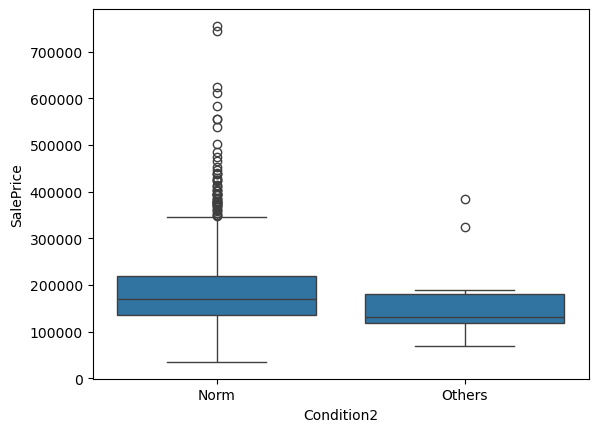

In [165]:
sns.boxplot(x=df_train['Condition2'], y=df_train['SalePrice'])
plt.show()

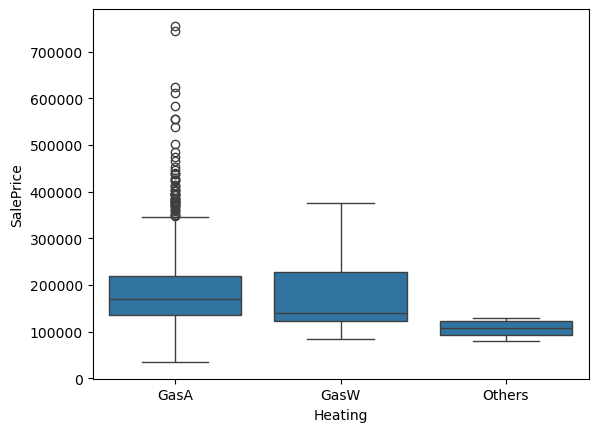

In [166]:
sns.boxplot(x=df_train['Heating'], y=df_train['SalePrice'])
plt.show()

The variables Condition2 and Heating have high p-values (>0.05), indicating minimal impact on SalePrice. Therefore, they will be removed from both the training and testing sets.

In [167]:
df_test.drop(columns=low_impact_vars, inplace=True)
df_train.drop(columns=low_impact_vars, inplace=True)

In [168]:
df_train.shape

(1338, 71)

In [169]:
df_test.shape

(1459, 70)

### 2.2 Convert Categorical Variables to Numeric Values.

In [170]:
cat_to_num = df_train.select_dtypes(include=['object', 'category']).columns
print(f"Total categorical variables: {len(cat_to_num)}")
print(cat_to_num)

Total categorical variables: 34
Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


Iterate through all categorical variables and conduct independent t-test or one-way ANOVA, to rank the variables based on their p-values in ascending order to highlight the most significant factors.

In [171]:
import scipy.stats as stats

cat_var_ps = {}
for col in cat_to_num:
    if df_train[col].nunique() == 2:
        # Perform t-test for binary categorical variables
        groups = [df_train['SalePrice'][df_train[col] == cat] for cat in df_train[col].unique()]
        stat, p_value = stats.ttest_ind(*groups, nan_policy='omit')
    else:
        # Perform ANOVA for multi-category variables
        groups = [df_train['SalePrice'][df_train[col] == cat] for cat in df_train[col].unique()]
        stat, p_value = stats.f_oneway(*groups)
    cat_var_ps[col] = round(p_value, 5)

df_cat_var_ps = pd.DataFrame(list(cat_var_ps.items()), columns=['categorical_Variable', 'p_value']).sort_values(by='p_value', ascending=False)
df_cat_var_ps   


,categorical_Variable,p_value
5,LandSlope,0.02638
21,BsmtFinType2,0.00158
26,Functional,0.00143
15,ExterCond,0.00013
11,RoofMatl,0.00002
4,LotConfig,0.00001
0,MSSubClass,0.00000
22,HeatingQC,0.00000
23,CentralAir,0.00000
24,Electrical,0.00000


A lower p-value for a categorical variable in a t-test or ANOVA (F-test) typically suggests a stronger impact on housing prices. However, in large datasets, p-values can become very small simply due to the sample size rather than indicating a meaningful effect. To ensure that a low p-value reflects a genuine impact on housing prices rather than being an artifact of sample size, it is essential to consider effect size measures alongside p-values.

In [172]:
unique_values = []
nunique = []
for col in cat_to_num:
    unique_values.append(df_train[col].unique())
    nunique.append(df_train[col].nunique())
df_cat_var_unique = pd.DataFrame({'categorical variable': cat_to_num, 'unique values': unique_values, 'unique number': nunique})
df_cat_var_unique

,categorical variable,unique values,unique number
0,MSSubClass,"[60, 20, 70, 50, 190, ..., 85, 90, 80, 160, 75...",13
1,MSZoning,"[RL, RM, Others, FV]",4
2,LotShape,"[Reg, IR1, IR2-3]",3
3,LandContour,"[Lvl, Bnk, Low, HLS]",4
4,LotConfig,"[Inside, FR2-3, Corner, CulDSac]",4
5,LandSlope,"[Gtl, Mod+]",2
6,Neighborhood,"[CollgCr, Others, Crawfor, NoRidge, Mitchel, S...",22
7,Condition1,"[Norm, Feedr, PosN, Artery, Others, RRAn]",6
8,BldgType,"[1Fam, 2fmCon, TwnhsE, Duplex, Twnhs]",5
9,HouseStyle,"[2Story, 1Story, 1.5Fin, Others, SFoyer, SLvl]",6


After reviewing the unique values of 34 categorical variables, I identified 10 as ordinal variables, which will be encoded with descending integers, and CentralAir as a binary variable. The remaining variables will be transformed using one-hot encoding.

In [173]:
# Define three subgroups of categorical variables
ordinal_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'PavedDrive']
onehot_vars = []

for col in cat_to_num:
    if col not in ordinal_vars and col != 'CentralAir':
        onehot_vars.append(col)

print("The ordinal variables are: \n", ordinal_vars)
print(f"\nThe number of nominal_variables for One-Hot Encoding is: {len(onehot_vars)}")
print(f"The number of categorical variables is: {len(cat_to_num)}")

The ordinal variables are: 
 ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'PavedDrive']

The number of nominal_variables for One-Hot Encoding is: 23
The number of categorical variables is: 34


In [174]:
# Display updated unique categories of ordinal variables
for col in ordinal_vars:
    print(f'Training dataset "{col}": {sorted(df_train[col].unique())}')
    print(f'Testing dataset "{col}": {sorted(df_test[col].dropna().unique())}\n')

Training dataset "ExterQual": ['Ex', 'Gd', 'TA-Fa']
Testing dataset "ExterQual": ['Ex', 'Gd', 'TA-Fa']

Training dataset "ExterCond": ['Ex-Gd', 'Fa', 'TA']
Testing dataset "ExterCond": ['Ex-Gd', 'Fa', 'Po', 'TA']

Training dataset "BsmtQual": ['Ex', 'Fa', 'Gd', 'TA']
Testing dataset "BsmtQual": ['Ex', 'Fa', 'Gd', 'TA']

Training dataset "BsmtCond": ['Fa-Po', 'Gd', 'TA']
Testing dataset "BsmtCond": ['Fa-Po', 'Gd', 'TA']

Training dataset "BsmtExposure": ['Av', 'Gd', 'Mn', 'No']
Testing dataset "BsmtExposure": ['Av', 'Gd', 'Mn', 'No']

Training dataset "HeatingQC": ['Ex', 'Fa-Po', 'Gd', 'TA']
Testing dataset "HeatingQC": ['Ex', 'Fa-Po', 'Gd', 'TA']

Training dataset "KitchenQual": ['Ex', 'Fa', 'Gd', 'TA']
Testing dataset "KitchenQual": ['Ex', 'Fa', 'Gd', 'TA']

Training dataset "GarageFinish": ['Fin', 'RFn', 'Unf']
Testing dataset "GarageFinish": ['Fin', 'RFn', 'Unf']

Training dataset "GarageQual": ['Fa', 'Gd', 'TA']
Testing dataset "GarageQual": ['Fa', 'Gd', 'TA']

Training dataset "Pa

All ordinal variables have identical unique categories in both the training and testing datasets, except for ExterCond, where the testing dataset contains an additional category, 'Po' (Poor).

In [175]:
# Define a dictionary of dictionary containing map of value-to-integer for every ordinal variable
# For Combined category, the numeric value is given by its dominant category 
ordinal_vars_map = {
    "ExterQual": {'Ex': 5, 'Gd': 4, 'TA-Fa': 3, "Po": 1}, #  In original training set, 'TA'(Average/Typical): 3--803, Fa (Fair): 2--7, so 'TA-Fa':3.
    "ExterCond": {'Ex-Gd': 4, 'TA': 3, "Fa": 2, "Po": 1}, #  In original training set, 'Ex'(Excellent): 5--2, Gd (Good): 4--137, so 'Ex-Gd':4.
    "BsmtQual": {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, "NA": 0}, 
    "BsmtCond": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa-Po": 2, "NA": 0}, # In original training set, 'Fa'(Fair): 2--38, Po (Poor): 1--1, so 'Fa-Po':2.
    "BsmtExposure": {'Gd': 4, 'Av': 3, 'Mn': 2, "No": 1, "NA": 0}, 
    "HeatingQC": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa-Po": 2}, # In original training set, 'Fa'(Fair): 2--36, Po (Poor): 1--1, so 'Fa-Po':2.
    "KitchenQual": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1}, 
    "GarageFinish": {'Fin': 3, 'RFn': 2, 'Unf': 1, "NA": 0},
    "GarageQual": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1, "NA": 0},
    "PavedDrive": {'Y': 2, 'P': 1, 'N': 0}
    }

# Convert each subgroup of categorical variables to numeric values differently
for col in cat_to_num:
    if col in ordinal_vars_map: 
        # Retrieve value-to-integer map for each col
        value_to_int_map = ordinal_vars_map[col]
        # Convert to integer using the map
        df_train[col] = df_train[col].map(value_to_int_map)
        df_test[col] = df_test[col].map(value_to_int_map)


    # One-hot encoding
    elif col in onehot_vars: 
        # Generate one-hot encoded columns for the train dataset and drop the first column
        one_hot = pd.get_dummies(df_train[col], prefix=col).iloc[:, 1:].astype('int64')
        df_train = pd.concat([df_train, one_hot], axis=1).drop(columns=[col]) # Concatenate with the train set and drop the original column

        # Generate one-hot encoded columns for the test dataset
        one_hot_test = pd.get_dummies(df_test[col], prefix=col).astype('int64')
        
        # Ensure consistency in one-hot encoded columns
        for col1 in one_hot.columns:
            if col1 not in one_hot_test:
                one_hot_test[col1] = 0
        
        one_hot_test = one_hot_test[one_hot.columns]  # Align columns to ensure the same order and drop any excess in the test set
        df_test = pd.concat([df_test, one_hot_test], axis=1).drop(columns=col) # Concatenate with the test set and drop the original column
                
    # Binary encoding
    else: 
        df_train[col] = df_train[col].map({'Y':1, 'N':0})
        df_test[col] = df_test[col].map({'Y':1, 'N':0})

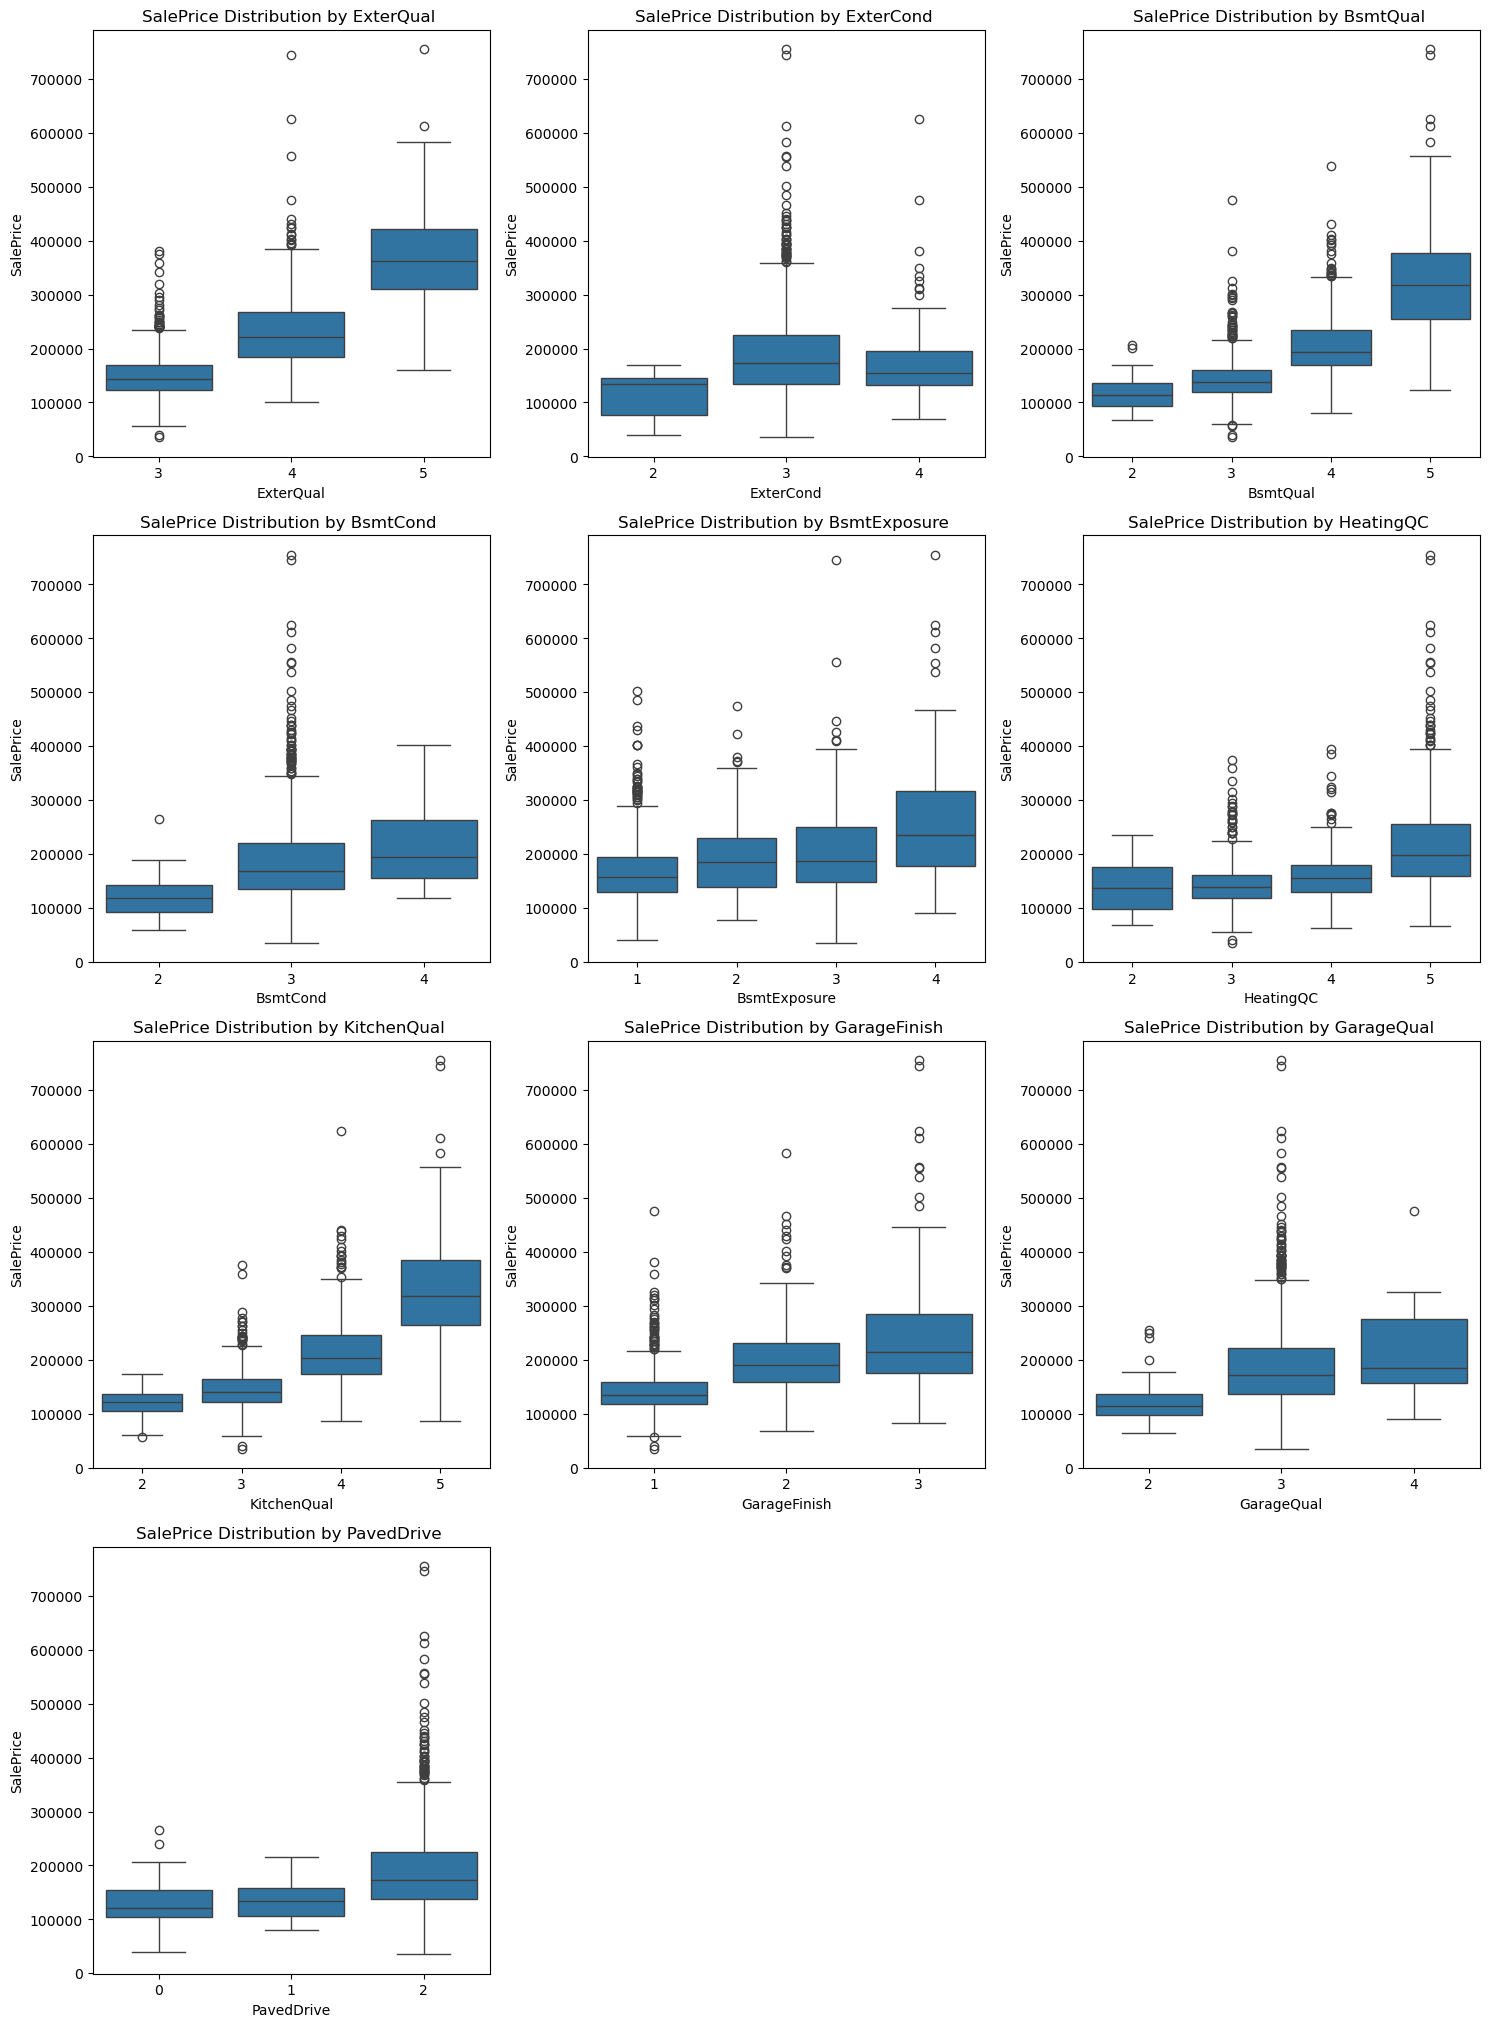

In [176]:
fig, axes = plt.subplots(5, 3, figsize=(15, 25)) 
axes = axes.flatten() 
i=0
for col in ordinal_vars:
    #groups = [df_train['SalePrice'][df_train[col] == cat] for cat in df_train[col].unique()]
    sns.boxplot(x=df_train[col], y=df_train['SalePrice'], ax=axes[i])
    axes[i].set_title(f"SalePrice Distribution by {col} ")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')
    i += 1

for idx in range(i, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()   

The boxplots for each ordinal variable indicate a clear but imperfect linear increasing trend in SalePrice across different levels of each ordinal variable. While the relationship is not strictly linear due to overlapping interquartile ranges and varying dispersion, the overall pattern suggests that higher ordinal values generally correspond to higher SalePrice.

In [177]:
for col in ordinal_vars:
    print(df_train[col].value_counts())
    print(df_train[col].nunique(), '\n')

ExterQual
3    810
4    477
5     51
Name: count, dtype: int64
3 

ExterCond
3    1183
4     139
2      16
Name: count, dtype: int64
3 

BsmtQual
3    594
4    592
5    120
2     32
Name: count, dtype: int64
4 

BsmtCond
3    1237
4      62
2      39
Name: count, dtype: int64
3 

BsmtExposure
1    887
3    213
4    127
2    111
Name: count, dtype: int64
4 

HeatingQC
5    704
3    380
4    217
2     37
Name: count, dtype: int64
4 

KitchenQual
3    650
4    568
5     97
2     23
Name: count, dtype: int64
4 

GarageFinish
1    580
2    413
3    345
Name: count, dtype: int64
3 

GarageQual
3    1270
2      51
4      17
Name: count, dtype: int64
3 

PavedDrive
2    1257
0      54
1      27
Name: count, dtype: int64
3 



In [178]:
df_train.shape

(1338, 155)

In [179]:
df_test.shape

(1459, 154)

# 3. Numerical Variables

## 3.1 Drop One Variable--PoolArea--with extremely skewed distribution.

In [180]:
dominate_num_cols = []
extreme_dominate_num_cols= []
for col in numeric_vars:
    count = df_train[col].value_counts().head(1).values[0]
    ratio = count / 1338
    if ratio > 0.9:
        print(f"\nColumn: {col}")
        print(f"The proportion of the most frequent value is: {round(ratio, 2)}")
        print(df_train[col].value_counts().head(3))
        dominate_num_cols.append(col)
        if ratio > 0.99:
            extreme_dominate_num_cols.append(col)
print("\n")

print(f'There are {len(dominate_num_cols)} variables with ratio above 0.9: {dominate_num_cols}')
print(f'There are {len(extreme_dominate_num_cols)} variables with ratio above 0.99: {extreme_dominate_num_cols}')



Column: LowQualFinSF
The proportion of the most frequent value is: 0.99
LowQualFinSF
0      1320
80        3
360       2
Name: count, dtype: int64

Column: BsmtHalfBath
The proportion of the most frequent value is: 0.94
BsmtHalfBath
0    1258
1      79
2       1
Name: count, dtype: int64

Column: KitchenAbvGr
The proportion of the most frequent value is: 0.97
KitchenAbvGr
1    1299
2      38
3       1
Name: count, dtype: int64

Column: 3SsnPorch
The proportion of the most frequent value is: 0.98
3SsnPorch
0      1315
168       3
144       2
Name: count, dtype: int64

Column: ScreenPorch
The proportion of the most frequent value is: 0.91
ScreenPorch
0      1222
192       6
120       5
Name: count, dtype: int64

Column: PoolArea
The proportion of the most frequent value is: 0.99
PoolArea
0      1331
512       1
648       1
Name: count, dtype: int64

Column: MiscVal
The proportion of the most frequent value is: 0.96
MiscVal
0      1291
400      10
500       7
Name: count, dtype: int64




There are 7 variables—'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'
— where the most frequent value dominates more than 90% of the records. Among them, PoolArea is extreme case, with over 99% of records falling into the most frequent value, and will be removed from both the training and testing sets. 

In [181]:
df_test.drop(columns=extreme_dominate_num_cols, inplace=True)
df_train.drop(columns=extreme_dominate_num_cols, inplace=True)

In [182]:
remaining_dominate_num_cols = list(set(dominate_num_cols) - set(extreme_dominate_num_cols))
for col in remaining_dominate_num_cols:
    print(f"\nColumn: {col}")
    print(df_train[col].value_counts())
    print(f"Unique count: {df_train[col].nunique()}")


Column: LowQualFinSF
LowQualFinSF
0      1320
80        3
360       2
528       1
572       1
144       1
392       1
390       1
420       1
473       1
156       1
232       1
481       1
120       1
397       1
384       1
Name: count, dtype: int64
Unique count: 16

Column: KitchenAbvGr
KitchenAbvGr
1    1299
2      38
3       1
Name: count, dtype: int64
Unique count: 3

Column: ScreenPorch
ScreenPorch
0      1222
192       6
120       5
224       5
189       4
180       4
147       3
90        3
160       3
144       3
126       3
168       3
198       2
259       2
288       2
184       2
176       2
200       2
142       2
100       2
170       2
216       2
175       1
152       1
63        1
312       1
222       1
265       1
322       1
190       1
233       1
410       1
273       1
53        1
143       1
204       1
263       1
80        1
163       1
116       1
480       1
178       1
440       1
155       1
220       1
119       1
165       1
225       1
287       1
19

In [183]:
import scipy.stats as stats

for col in remaining_dominate_num_cols:
    if df_train[col].nunique() == 2:
        # Perform t-test for binary numeric variables
        groups = [df_train['SalePrice'][df_train[col] == num] for num in df_train[col].unique()]
        stat, p_value = stats.ttest_ind(*groups, nan_policy='omit')
    else:
        # Perform ANOVA for multi-numeric variables
        groups = [df_train['SalePrice'][df_train[col] == num] for num in df_train[col].unique()]
        stat, p_value = stats.f_oneway(*groups)
    
    print(f"{col}: p-value = {p_value:.5f}")


LowQualFinSF: p-value = 0.09521
KitchenAbvGr: p-value = 0.00023
ScreenPorch: p-value = 0.06172
MiscVal: p-value = 0.60038
3SsnPorch: p-value = 0.50878
BsmtHalfBath: p-value = 0.51298


Variables MiscVal, 3SsnPorch, LowQualFinSF, BsmtHalfBath and ScreenPorch have high p-values (>0.05), indicating minimal impact on SalePrice. Rather than, removing these five variables from both the training and testing sets, I would like to first combine all of the less dominant values into one and later assess the impact of each variables on price using a t-test to determine which could be removed without significant loss of information.

## 3.2 Combine Less Dominant Values into One

Since I have 1338 observations in training set and 1320 observations in testing set. A reasonable threshold for a rare category needed to group is 1% (~13 observations). A key challenge is that categories might have different proportions in the two datasets. To ensure consistency, I must determine rare categories based on the training set and apply the same replacements to the testing set. 

- In MiscVal, since the most common category is 0, I replace all rare categories with 1, to make MiscVal as a binary variable; 
- In 3SsnPorch, since the most common category is 0, I replace all rare categories with 1, to make 3SsnPorch as a binary variable;
- In LowQualFinSF, since the most common category is 0, I replace all rare categories with 1, to make LowQualFinSF as a binary variable;
- In ScreenPorch, since the most common category is 0, I replace all rare categories with 1, to make ScreenPorch as a binary variable;;
- In BsmtHalfBatch, there are three categories--0, 1, 2, because most rare category only has one count, I combine it with the second most common category;
- In KitchenAbvGr,  there are three categories for each dataset. The categories 3 (training set) and 0 (testing set) are extremely rare. Keeping these values might cause issues with model generalization. I need to merge them into existing categories consistently. Since KitchenAbvGr is an ordinal variable (0 < 1 < 2 < 3), we should merge the rarest categories into their closest reasonable value. 
Solution: 
    -Replace 3 → 2 (since 2 is the closest category in training set).
    -Replace 0 → 1 (since 1 is the closest category in testing set).

In [184]:
for col in remaining_dominate_num_cols:
    if col in ['MiscVal', '3SsnPorch', 'LowQualFinSF', 'ScreenPorch']:
        df_train[col] = replace_rare_categories(df_train, col, 1, threshold=0.01)
        df_test[col] = replace_rare_categories(df_test, col, 1, threshold=0.01)
    elif col == 'BsmtHalfBath':
        df_train[col] = df_train[col].replace(2, 1)
        df_test[col] = df_test[col].replace(2, 1) 
    elif col == 'KitchenAbvGr':
        df_train[col] = df_train[col].replace({3: 2, 0: 1})
        df_test[col] = df_test[col].replace({3: 2, 0: 1})     

for col in remaining_dominate_num_cols:
    print(f"\nColumn: {col}")
    print(df_train[col].value_counts())
    print(f"Unique count: {df_train[col].nunique()}")   
    print(df_test[col].value_counts())
    print(f"Unique count: {df_test[col].nunique()}") 


Column: LowQualFinSF
LowQualFinSF
0    1320
1      18
Name: count, dtype: int64
Unique count: 2
LowQualFinSF
0    1445
1      14
Name: count, dtype: int64
Unique count: 2

Column: KitchenAbvGr
KitchenAbvGr
1    1299
2      39
Name: count, dtype: int64
Unique count: 2
KitchenAbvGr
1    1395
2      64
Name: count, dtype: int64
Unique count: 2

Column: ScreenPorch
ScreenPorch
0    1222
1     116
Name: count, dtype: int64
Unique count: 2
ScreenPorch
0    1319
1     140
Name: count, dtype: int64
Unique count: 2

Column: MiscVal
MiscVal
0    1291
1      47
Name: count, dtype: int64
Unique count: 2
MiscVal
0    1408
1      51
Name: count, dtype: int64
Unique count: 2

Column: 3SsnPorch
3SsnPorch
0    1315
1      23
Name: count, dtype: int64
Unique count: 2
3SsnPorch
0    1446
1      13
Name: count, dtype: int64
Unique count: 2

Column: BsmtHalfBath
BsmtHalfBath
0    1258
1      80
Name: count, dtype: int64
Unique count: 2
BsmtHalfBath
0.0    1364
1.0      93
Name: count, dtype: int64
Unique 

For six highly skewed categorical variables where the most dominant category accounts for more than 90%—'LowQualFinSF,' 'BsmtHalfBath,' 'KitchenAbvGr,' '3SsnPorch,' 'ScreenPorch,' and 'MiscVal'—I finally combined rare categories (those accounting for less than 1% of total observations) into a single category consistently across both training and testing datasets, ultimately transforming them into binary variables. Next, I assess how much each binary variable impact on target variable using t-test. 

In [185]:
import scipy.stats as stats

for col in remaining_dominate_num_cols:
    # Perform t-test for binary numeric variables
    groups = [df_train['SalePrice'][df_train[col] == num] for num in df_train[col].unique()]
    stat, p_value = stats.ttest_ind(*groups, nan_policy='omit')
    
    print(f"{col}: p-value = {p_value:.5f}")

LowQualFinSF: p-value = 0.16689
KitchenAbvGr: p-value = 0.00005
ScreenPorch: p-value = 0.01135
MiscVal: p-value = 0.01467
3SsnPorch: p-value = 0.10688
BsmtHalfBath: p-value = 0.25647


The variables '3SsnPorch', 'LowQualFinSF', and 'BsmtHalfBath' have high p-values (>0.05), indicating minimal impact on SalePrice. Given their high skewness, they will be removed from both the training and testing datasets.

In [186]:
df_test.drop(columns=['3SsnPorch', 'LowQualFinSF', 'BsmtHalfBath'], inplace=True)
df_train.drop(columns=['3SsnPorch', 'LowQualFinSF', 'BsmtHalfBath'], inplace=True)

In [187]:
categorical_vars = df_train.select_dtypes(include=['object', 'category']).columns
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns
print(f"Total number of categorical variables is: {len(categorical_vars)}")
print(f"Total number of numeric variables is: {len(numeric_vars)}")

Total number of categorical variables is: 0
Total number of numeric variables is: 151


In [188]:
df_train.shape

(1338, 151)

In [189]:
df_test.shape

(1459, 150)

# 4. Visualize Relationships Between Variables

## 4.1 Correlation Matrix and Heatmap View

In [190]:
# To display only the rows and columns that contain yellow background cells and exclude those without
corr_matrix = df_train.corr()
threshold = 0.5
# Identify the cells that meet the threshold condition
highlight_mask = (abs(corr_matrix) > threshold) & (abs(corr_matrix) < 1)
# Filter rows and columns with at least one highlighted cell
rows_to_keep = highlight_mask.any(axis=1)
cols_to_keep = highlight_mask.any(axis=0)      

# Extract the relevant portion of the correlation matrix
filtered_corr_matrix = corr_matrix.loc[rows_to_keep, cols_to_keep]

# Style the filtered correlation matrix
styled_filtered_corr_matrix = filtered_corr_matrix.style.applymap(
    lambda x: 'background-color: yellow' if abs(x) > threshold and abs(x) < 1 else ''
    )
# Disply the styled matrix
styled_filtered_corr_matrix

C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_36252\89106773.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_filtered_corr_matrix = filtered_corr_matrix.style.applymap(


,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice,MSSubClass_60,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_190,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod+,Neighborhood_OldTown,Condition1_Feedr,Condition1_Norm,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,BsmtFinType1_Unf,BsmtFinType2_G-ALQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Functional_Min2,Functional_Others,Functional_Typ,GarageType_Detchd,GarageCond_Others,GarageCond_TA,SaleType_New,SaleType_WD,SaleCondition_Partial
OverallQual,1.000000,0.570668,0.549460,0.722328,0.672961,0.197441,-0.086014,0.292940,0.505897,0.449863,0.481978,0.281145,0.594470,0.083254,0.580425,0.249283,0.081994,-0.136139,0.667729,0.442941,0.545835,0.516528,0.591878,0.530092,0.783546,0.340009,0.038411,-0.037804,-0.077172,-0.107081,0.165967,-0.006505,-0.116332,0.132927,-0.209730,0.107611,-0.022284,-0.005671,-0.052296,-0.165234,-0.122171,0.101334,-0.123554,-0.107081,0.005608,0.116978,-0.088486,0.265854,0.000270,-0.097579,-0.047778,-0.005280,0.135497,-0.118277,-0.199335,-0.062195,0.029002,0.355899,-0.161347,-0.025096,0.009614,0.149746,-0.094450,-0.191630,-0.113450,-0.013263,0.359366,-0.164800,0.010968,-0.480077,0.566404,0.054407,0.004459,-0.068494,-0.103166,0.142929,-0.128083,-0.023363,0.147677,-0.409873,-0.058580,0.159807,0.332307,-0.235661,0.327228
YearBuilt,0.570668,1.000000,0.617156,0.592714,0.725856,0.224264,-0.070403,0.147762,0.385146,0.454093,0.263585,0.006989,0.189146,0.175108,0.486777,0.227626,-0.080644,-0.171556,0.519624,0.099415,0.825172,0.583219,0.524076,0.443854,0.504297,0.386159,-0.210367,0.004926,0.003943,-0.022229,0.229705,0.109385,-0.175720,0.260974,-0.397518,0.046045,-0.000651,0.109307,-0.079742,-0.481137,-0.101584,0.185276,-0.175729,-0.022229,0.088895,0.236304,0.124591,0.189551,-0.253917,0.020349,0.008074,-0.106683,0.093711,0.004500,-0.204977,0.013953,-0.185080,0.539836,-0.420954,-0.064314,-0.049646,0.109825,-0.004407,-0.194757,-0.020251,-0.220969,0.537186,-0.401820,-0.101124,-0.314006,0.649886,-0.095599,-0.005195,-0.034470,-0.075664,0.095955,-0.137148,-0.059499,0.172180,-0.567176,-0.124805,0.287335,0.352432,-0.239675,0.348773
YearRemodAdd,0.549460,0.617156,1.000000,0.589498,0.576662,0.099681,-0.085268,0.171881,0.264281,0.551137,0.241889,0.120545,0.276580,0.099294,0.460120,0.169456,-0.074393,-0.155495,0.635635,0.174660,0.641585,0.452869,0.459449,0.386213,0.501435,0.280536,-0.044299,-0.041064,-0.021704,-0.109305,0.175513,0.031116,-0.139310,0.078164,-0.166881,0.051874,-0.004437,0.066868,-0.057551,-0.147211,-0.109238,0.139040,-0.145621,-0.109305,0.039824,0.159757,0.027818,0.203464,-0.097470,-0.018429,-0.049161,-0.140757,0.089354,-0.114127,-0.187897,-0.085435,-0.047434,0.493269,-0.215853,-0.046562,-0.082184,0.103865,-0.101857,-0.191471,-0.106697,-0.078897,0.490551,-0.226014,-0.014081,-0.444893,0.578218,0.048384,0.016715,-0.093359,-0.092252,0.130015,-0.053014,-0.024122,0.079453,-0.347818,-0.107131,0.168165,0.327280,-0.176790,0.324076
ExterQual,0.722328,0.592714,0.589498,1.000000,0.647086,0.167586,-0.091675,0.284919,0.461101,0.523343,0.390705,0.173474,0.435376,0.102218,0.493006,0.169302,-0.028301,-0.124363,0.712550,0.311448,0.584056,0.494019,0.524609,0.481703,0.668558,0.279331,-

In [191]:
filtered_corr_matrix.shape

(85, 85)

The variables most strongly correlated with the target variable SalePrice (|r| > 0.5) are, in descending order of correlation: OverallQual, GrLivArea, ExterQual, KitchenQual, BsmtQual, GarageCars, GarageArea, 1stFlrSF, TotalBsmtSF, FullBath, TotRmsAbvGrd, GarageFinish, YearBuilt, and YearRemodAdd.

In [192]:
# To display only the rows and columns that contain yellow background cells and exclude those without
corr_matrix = df_train.corr()
threshold = 0.8
# Identify the cells that meet the threshold condition
highlight_mask = (abs(corr_matrix) > threshold) & (abs(corr_matrix) < 1)
# Filter rows and columns with at least one highlighted cell
rows_to_keep = highlight_mask.any(axis=1)
cols_to_keep = highlight_mask.any(axis=0)      

# Extract the relevant portion of the correlation matrix
filtered_corr_matrix = corr_matrix.loc[rows_to_keep, cols_to_keep]

# Style the filtered correlation matrix
styled_filtered_corr_matrix = filtered_corr_matrix.style.applymap(
    lambda x: 'background-color: red' if abs(x) > threshold and abs(x) < 1 else ''
    )
# Disply the styled matrix
styled_filtered_corr_matrix

C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_36252\2620582487.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_filtered_corr_matrix = filtered_corr_matrix.style.applymap(


,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,MSSubClass_80,MSSubClass_190,MSZoning_RL,MSZoning_RM,BldgType_2fmCon,HouseStyle_2Story,HouseStyle_SLvl,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,SaleType_New,SaleCondition_Partial
YearBuilt,1.000000,0.385146,0.263585,0.006989,0.189146,0.099415,0.825172,0.524076,0.443854,0.004926,-0.175720,0.260974,-0.397518,-0.175729,0.189551,0.008074,0.093711,0.004500,-0.204977,0.539836,-0.420954,0.109825,-0.004407,-0.194757,0.537186,-0.401820,-0.314006,0.649886,0.352432,0.348773
TotalBsmtSF,0.385146,1.000000,0.893110,-0.234070,0.460778,0.297609,0.321500,0.453427,0.511475,-0.084695,-0.054226,0.286002,-0.264562,-0.055318,-0.243023,-0.106613,0.124814,-0.087423,-0.152661,0.156083,-0.117814,0.125499,-0.063051,-0.147102,0.152287,-0.105843,-0.149699,0.271629,0.269195,0.269479
1stFlrSF,0.263585,0.893110,1.000000,-0.220279,0.554846,0.393786,0.237928,0.440237,0.500071,0.018799,-0.009703,0.305139,-0.254640,-0.013136,-0.293516,0.009684,0.134513,-0.092913,-0.161259,0.069235,-0.041671,0.116619,-0.055564,-0.158488,0.069755,-0.044798,-0.092198,0.180555,0.220162,0.219781
2ndFlrSF,0.006989,-0.234070,-0.220279,1.000000,0.685710,0.619275,0.060414,0.187208,0.124564,-0.083607,0.021298,-0.097743,0.040817,0.016048,0.816780,-0.089883,0.018404,-0.042102,-0.043234,0.102357,-0.006755,0.019587,-0.031046,-0.047727,0.102294,-0.019265,-0.250392,0.194411,0.010444,0.003958
GrLivArea,0.189146,0.460778,0.554846,0.685710,1.000000,0.823491,0.224903,0.483943,0.477868,-0.058466,0.009784,0.138328,-0.147706,0.002768,0.469265,-0.070652,0.113761,-0.106649,-0.151771,0.132696,-0.028942,0.101568,-0.069376,-0.153407,0.133142,-0.043279,-0.283702,0.296347,0.169841,0.164037
TotRmsAbvGrd,0.099415,0.297609,0.393786,0.619275,0.823491,1.000000,0.148625,0.404416,0.368435,-0.035862,0.043447,0.157783,-0.137622,0.033005,0.441131,-0.046868,0.083255,-0.075150,-0.142006,0.129134,-0.013266,0.086087,-0.044415,-0.141591,0.129836,-0.027651,-0.218965,0.206029,0.158031,0.151861
GarageYrBlt,0.825172,0.321500,0.237928,0.060414,0.224903,0.148625,1.000000,0.590301,0.563860,-0.031232,-0.123475,0.143774,-0.272355,-0.121773,0.182104,-0.030994,0.097882,-0.046939,-0.197983,0.535792,-0.334039,0.107585,-0.049356,-0.196533,0.532035,-0.324930,-0.415520,0.654552,0.353118,0.347860
GarageCars,0.524076,0.453427,0.440237,0.187208,0.483943,0.404416,0.590301,1.000000,0.832166,-0.044783,-0.031301,0.152408,-0.207054,-0.029401,0.199296,-0.048456,0.083625,-0.112799,-0.178687,0.356560,-0.193742,0.089609,-0.095393,-0.178559,0.357339,-0.207075,-0.360227,0.476737,0.317304,0.311163
GarageArea,0.443854,0.511475,0.500071,0.124564,0.477868,0.368435,0.563860,0.832166,1.000000,-0.020311,-0.009838,0.148698,-0.225605,-0.007269,0.115328,-0.024551,0.096464,-0.093387,-0.130617,0.290921,-0.180161,0.096677,-0.071941,-0.133436,0.295250,-0.188720,-0.275788,0.389064,0.322455,0.319178
MSSubClass_80,0.004926,-0.084695,0.018799,-0.083607,-0.058466,-0.035862,-0.031232,-0.044783,-0.020311,1.000000,-0.026637,0.106554,-0.086079,-0.027274,-0.144168,0.941147,-0.044496,0.091501,-0.016187,-0.074672,-0.030113,-0.041991,0.131674,-0.035430,-0.071425,-0.027349,0.129130,-0.087464,-0.065298,-0.066211


In [193]:
row_set = set(rows_to_keep[rows_to_keep==True])
col_set = set(cols_to_keep[cols_to_keep == True])

# compare the sets
are_identical =  row_set == col_set
print('Are row_set and col_set the same?', are_identical)
              

Are row_set and col_set the same? True


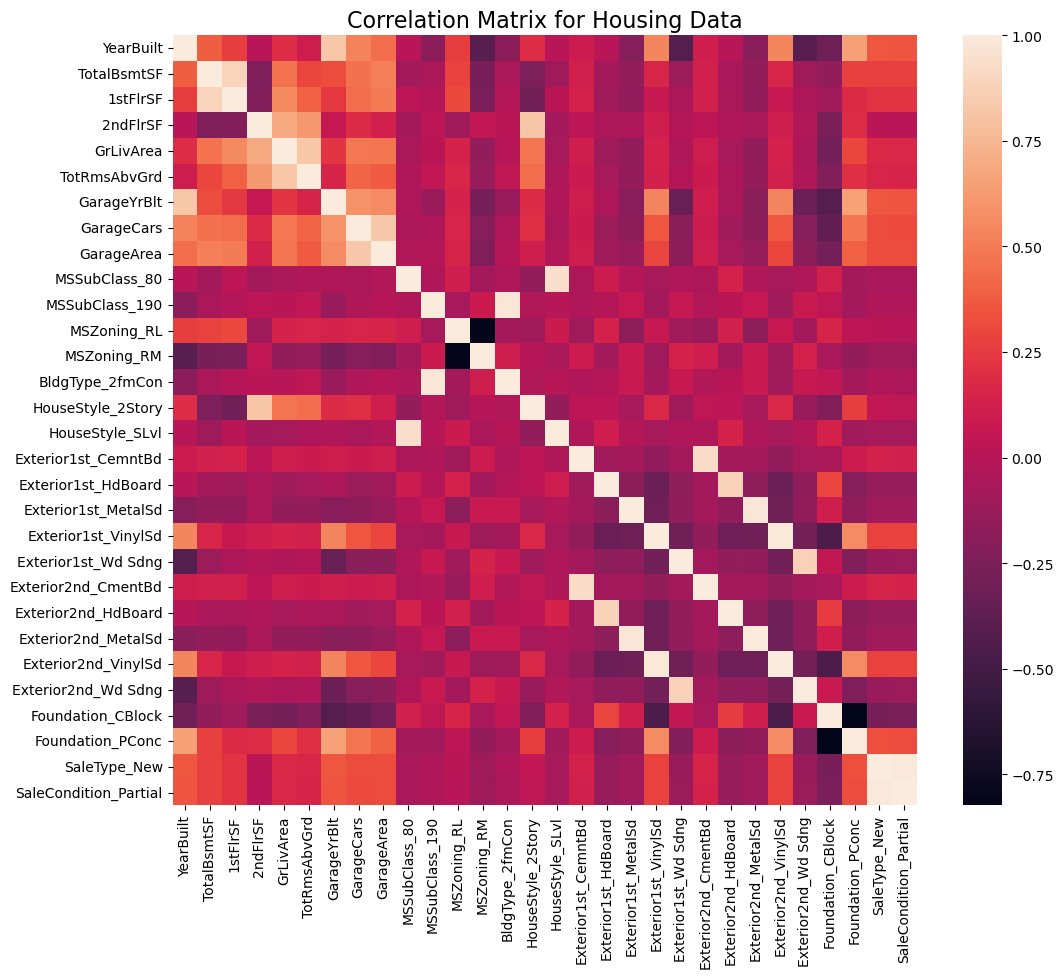

In [194]:
# Make a heatmap of the filtered maxtrix
plt.subplots(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix)
plt.title('Correlation Matrix for Housing Data', fontsize=16)
# Ensure the "figures" directory exists
figures_dir = "figures"
os.makedirs(figures_dir, exist_ok=True)

plt.savefig(os.path.join(figures_dir,'Correlation Matrix for Housing Data.jpg'), dpi=300, bbox_inches="tight")
plt.show()

After filtering for high Pearson correlations above 0.8 and highlighting them in red, I observed that some one-hot encoded categories exhibit strong correlations, such as GarageType_Detchd vs. GarageType_Attchd. This can lead to multicollinearity in linear models. To mitigate this, I should drop the most common category rather than the first when performing one-hot encoding. However, for tree-based models, multicollinearity is not a concern. I may adjust this approach later based on model performance.  
Notablely, SalePrice is not included in this highly correlated matrix. However, the strongest correlation with SalePrice is observed with OverallQual, which has a correlation coefficient of 0.78. 

In [195]:
# To display only the rows and columns that contain yellow background cells and exclude those without
corr_matrix = df_train.corr()

# Extract the relevant portion of the correlation matrix
corr_matrix_withPrice = corr_matrix.loc[['SalePrice'], (abs(corr_matrix['SalePrice']) > 0.5) & (abs(corr_matrix['SalePrice']) < 1) ]
price_corr_features = corr_matrix_withPrice.columns.tolist()

# Sort in descending order by absolute correlation values
corr_matrix_withPrice = corr_matrix_withPrice.T
corr_matrix_withPrice = corr_matrix_withPrice.abs().sort_values(by='SalePrice', ascending=False)

# Disply the matrix
corr_matrix_withPrice

,SalePrice
OverallQual,0.783546
GrLivArea,0.711706
ExterQual,0.668558
KitchenQual,0.650226
BsmtQual,0.643452
GarageCars,0.640154
GarageArea,0.607535
1stFlrSF,0.604714
TotalBsmtSF,0.602042
FullBath,0.569313


In [196]:
print(price_corr_features)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars', 'GarageArea']


In [197]:
print('MSZoning' in df_train.columns)

False


In [198]:
print(corr_matrix.loc['SalePrice', corr_matrix.columns.str.startswith('MSZoning')])

MSZoning_Others   -0.122611
MSZoning_RL        0.243886
MSZoning_RM       -0.286337
Name: SalePrice, dtype: float64


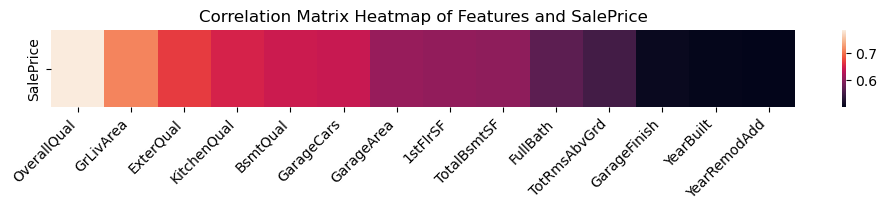

In [199]:
# Make Correlation Matrix Heatmap of Features and SalePrice
corr_matrix_withPrice = corr_matrix.loc[['SalePrice'], (abs(corr_matrix['SalePrice']) > 0.5) & (abs(corr_matrix['SalePrice']) < 1) ]
price_corr_features = corr_matrix_withPrice.columns.tolist()

# Sort in descending order by absolute correlation values
corr_matrix_withPrice = corr_matrix_withPrice.T
corr_matrix_withPrice = corr_matrix_withPrice.abs().sort_values(by='SalePrice', ascending=False)
corr_matrix_withPrice = corr_matrix_withPrice.T

plt.subplots(figsize=(12, 1))
sns.heatmap(corr_matrix_withPrice)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap of Features and SalePrice')
# plt.savefig('Correlation Matrix Heatmap of Features and SalePrice.jpg')
plt.show()

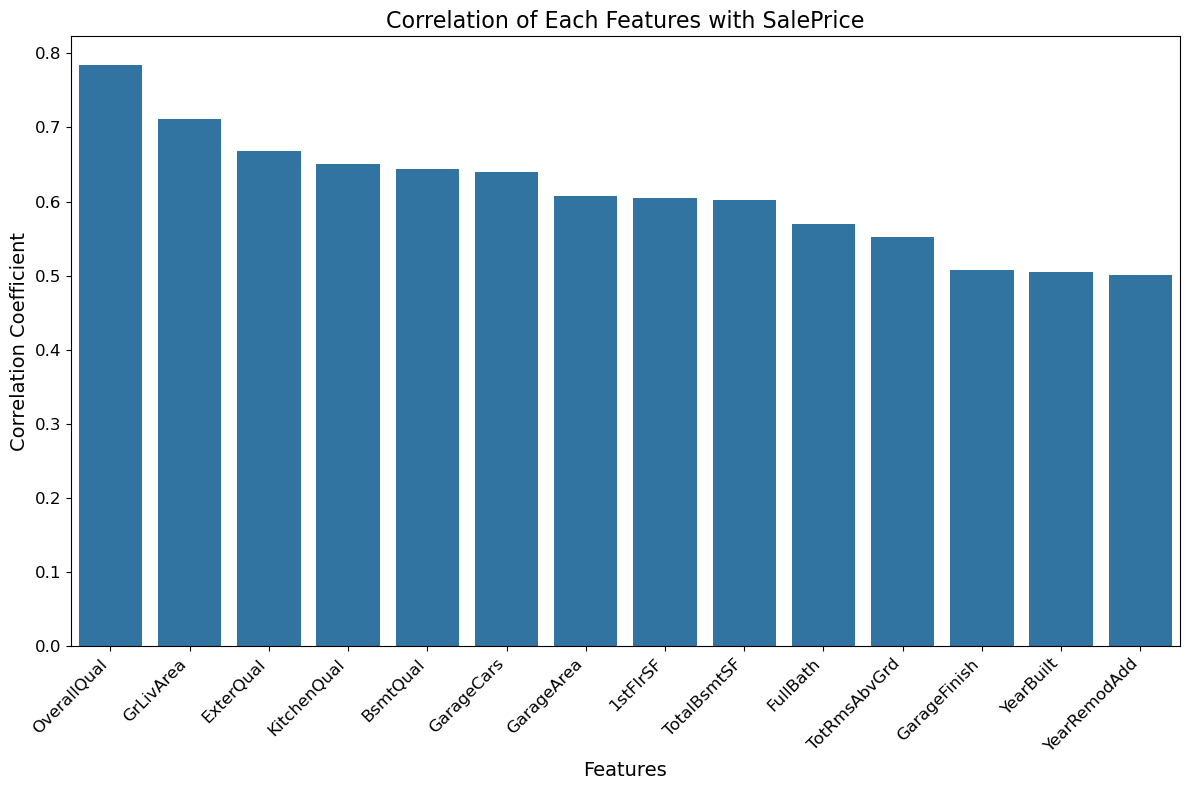

In [200]:
high_corr_price = corr_matrix.loc[['SalePrice'], (abs(corr_matrix['SalePrice']) > 0.5) & (abs(corr_matrix['SalePrice']) < 1) ]
high_corr_price_s = high_corr_price.T.sort_values(by='SalePrice', ascending=False)
plt.subplots(figsize=(12, 8))
sns.barplot(x=high_corr_price_s.index, y=high_corr_price_s['SalePrice'])
plt.title('Correlation of Each Features with SalePrice', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Correlation_with_SalePrice.jpg')

plt.tight_layout()
plt.show()

## 4.2 Boxplot view

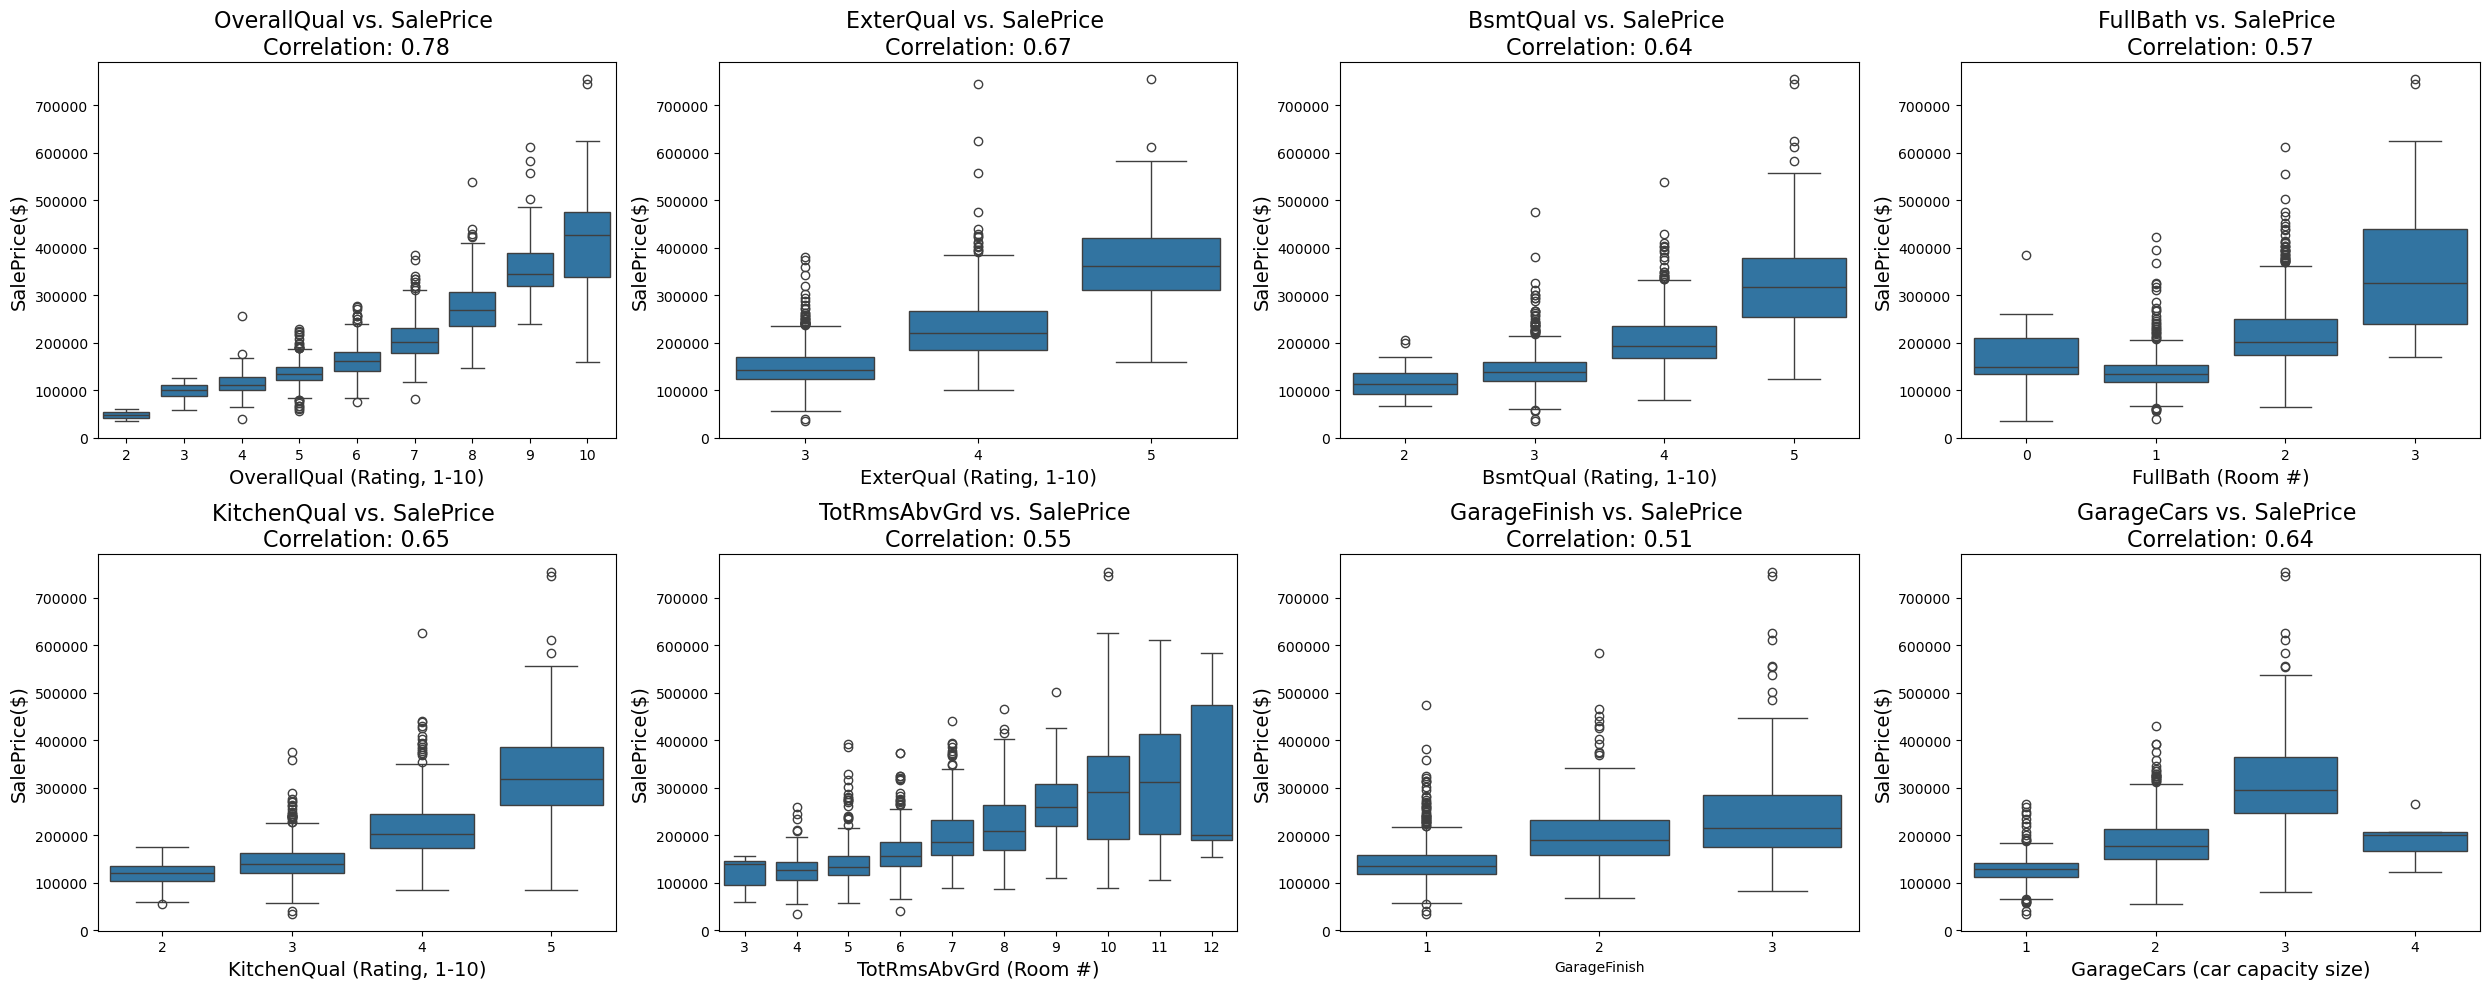

In [201]:
fig, axes = plt.subplots(2, 4, figsize=(25, 10))
axes = axes.flatten()
i = 0
for col in price_corr_features:
    if df_train[col].nunique() < 12: 
        sns.boxplot(x=df_train[col], y=df_train['SalePrice'], ax=axes[i])
        axes[i].set_title(f"{col} vs. SalePrice \nCorrelation: {corr_matrix.loc[col, 'SalePrice']:.2f}", fontsize=16)
        axes[i].set_ylabel('SalePrice($)', fontsize=14)
        if col == 'GrLivArea': 
            axes[i].set_xlabel(f'{col} (Square Feet)', fontsize=14)
        elif col == 'OverallQual':
            axes[i].set_xlabel(f'{col} (Rating, 1-10)', fontsize=14)
        elif col == 'ExterQual':
            axes[i].set_xlabel(f'{col} (Rating, 1-10)', fontsize=14)
        elif col == 'BsmtQual':
            axes[i].set_xlabel(f'{col} (Rating, 1-10)', fontsize=14)
        elif col == 'KitchenQual':
            axes[i].set_xlabel(f'{col} (Rating, 1-10)', fontsize=14)
        elif col == 'FullBath':
            axes[i].set_xlabel(f'{col} (Room #)', fontsize=14)
        elif col == 'TotRmsAbvGrd':
            axes[i].set_xlabel(f'{col} (Room #)', fontsize=14)
        elif col == 'GarageCars':
            axes[i].set_xlabel(f'{col} (car capacity size)', fontsize=14)
        i += 1

plt.tight_layout()
# plt.savefig('Boxplots of SalePrice with its most correlated Features.jpg')
plt.show()

In [202]:
df_train['GarageCars'].value_counts()

GarageCars
2    793
1    361
3    179
4      5
Name: count, dtype: int64

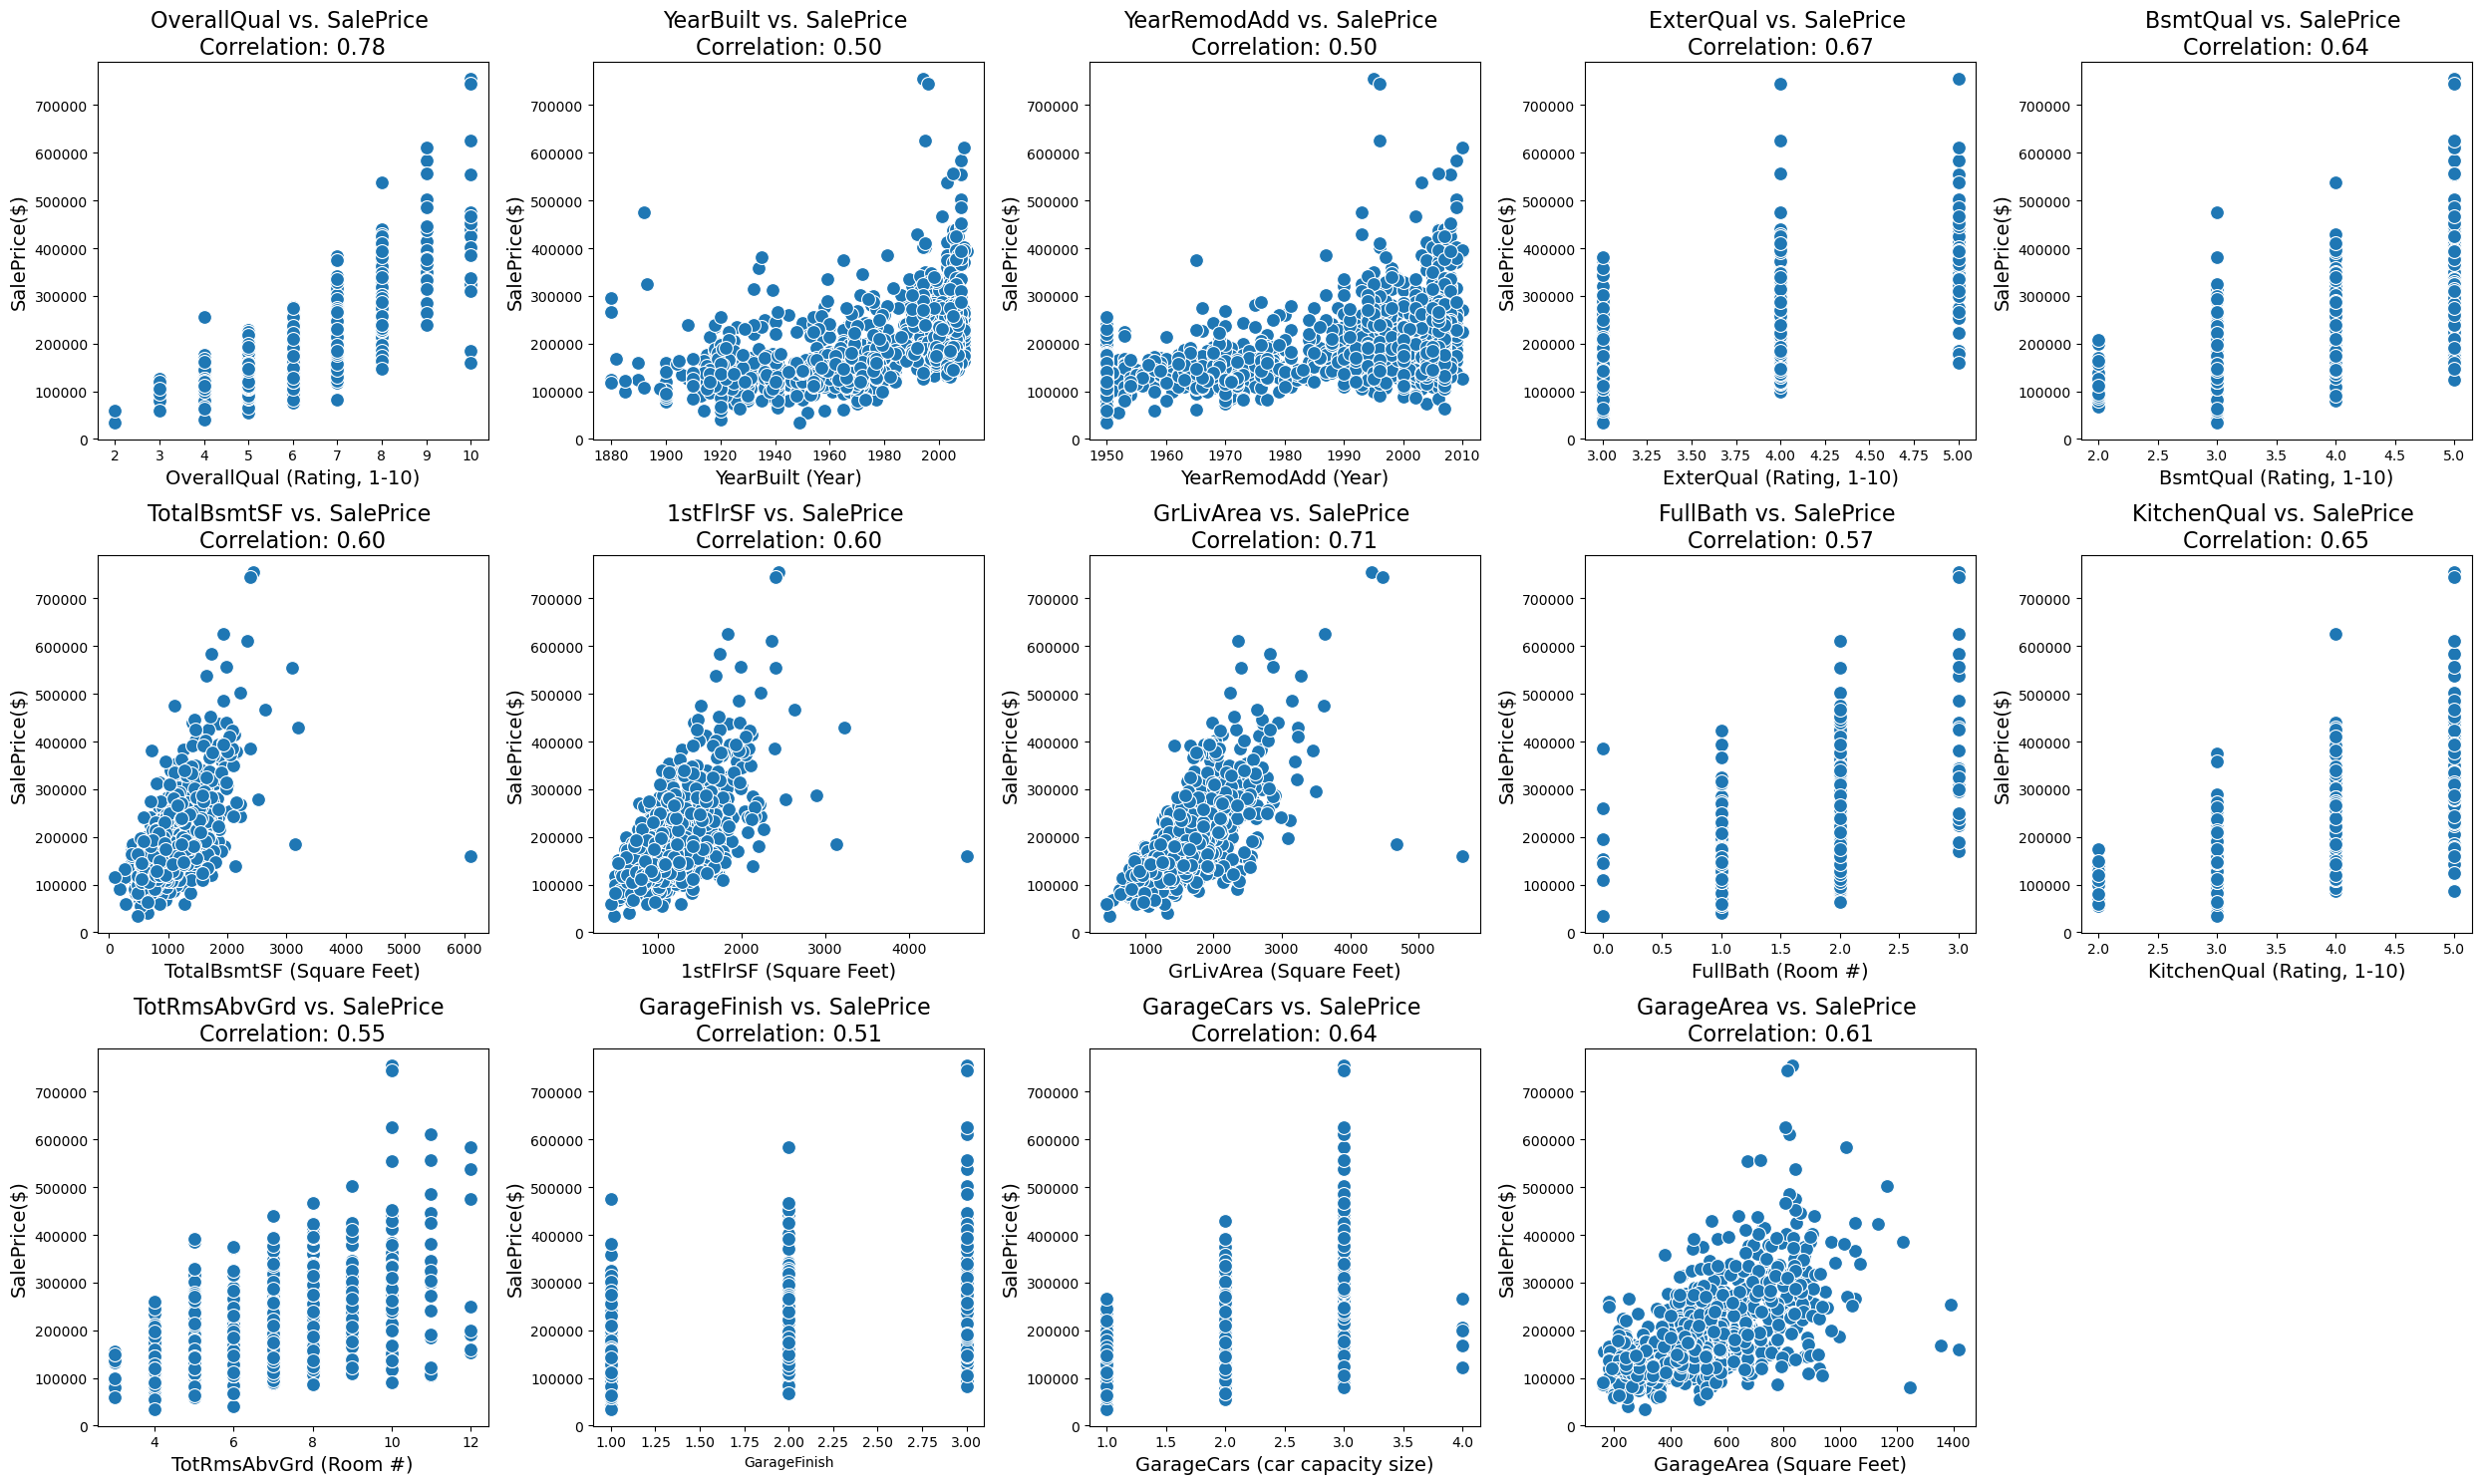

In [203]:
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.flatten()
i = 0
for col in price_corr_features:
    sns.scatterplot(x=df_train[col], y=df_train['SalePrice'], ax=axes[i], s=100)
    axes[i].set_title(f"{col} vs. SalePrice \nCorrelation: {corr_matrix.loc[col, 'SalePrice']:.2f}", fontsize=16)
    axes[i].set_ylabel('SalePrice($)', fontsize=14)
    if col == 'GrLivArea':
        axes[i].set_xlabel(f'{col} (Square Feet)', fontsize=14)
    elif col == 'OverallQual':
        axes[i].set_xlabel(f'{col} (Rating, 1-10)', fontsize=14)
    elif col == 'YearBuilt':
        axes[i].set_xlabel(f'{col} (Year)', fontsize=14)
    elif col == 'YearRemodAdd':
        axes[i].set_xlabel(f'{col} (Year)', fontsize=14)
    elif col == 'TotalBsmtSF':
        axes[i].set_xlabel(f'{col} (Square Feet)', fontsize=14)
    elif col == '1stFlrSF':
        axes[i].set_xlabel(f'{col} (Square Feet)', fontsize=14)
    elif col == 'GarageArea':
        axes[i].set_xlabel(f'{col} (Square Feet)', fontsize=14)
    elif col == 'ExterQual':
        axes[i].set_xlabel(f'{col} (Rating, 1-10)', fontsize=14)
    elif col == 'BsmtQual':
        axes[i].set_xlabel(f'{col} (Rating, 1-10)', fontsize=14)
    elif col == 'KitchenQual':
        axes[i].set_xlabel(f'{col} (Rating, 1-10)', fontsize=14)
    elif col == 'FullBath':
        axes[i].set_xlabel(f'{col} (Room #)', fontsize=14)
    elif col == 'TotRmsAbvGrd':
        axes[i].set_xlabel(f'{col} (Room #)', fontsize=14)
    elif col == 'GarageCars':
        axes[i].set_xlabel(f'{col} (car capacity size)', fontsize=14)    
    i += 1

for idx in range(i, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
# plt.savefig('Scatterplots of SalePrice with its most correlated Features.jpg')
plt.show()

## 4.3. Scatter Plots of highest correlated Features

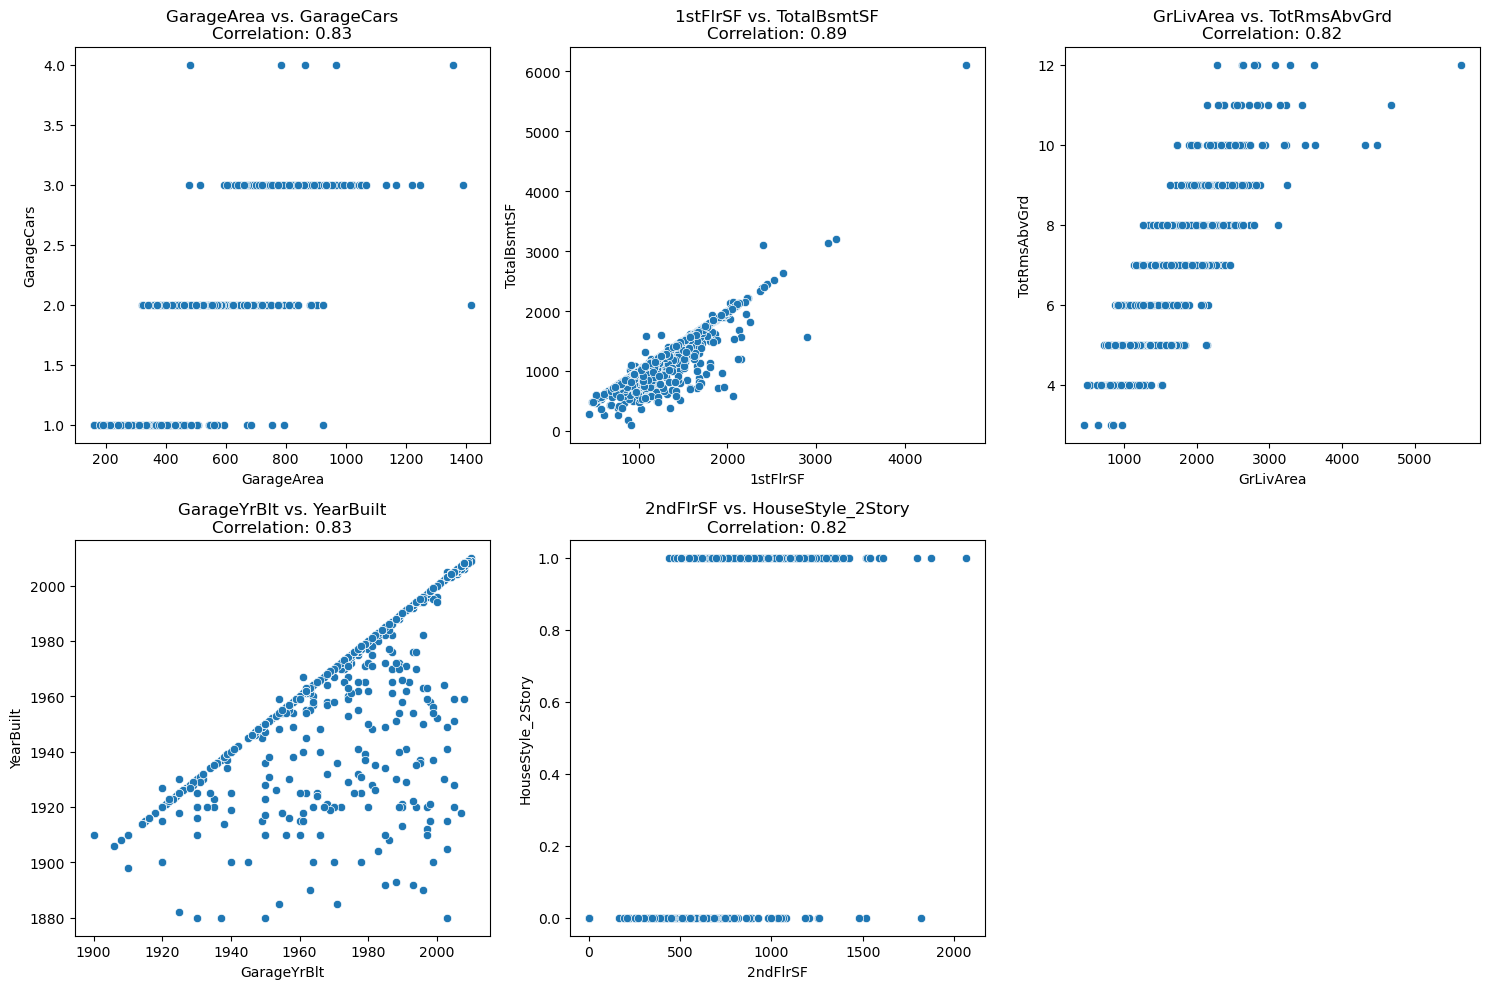

In [204]:
threshold = 0.8

# Identify binary features (those with only 2 unique values)
binary_features = [col for col in df_train.columns if df_train[col].nunique() == 2]

# Find feature pairs with high correlation (excluding self-correlation)
high_corr_pairs = []
for col in filtered_corr_matrix.columns:
    for row in filtered_corr_matrix.index:
        if col != row and abs(filtered_corr_matrix.loc[row, col]) > threshold:
            # Ensure at Least one variable is Not binary
            if not (col in binary_features and row in binary_features):
                high_corr_pairs.append((row, col))

# Remove duplicate pairs (since correlation matrix is symmetric)
unique_high_corr_pairs = list(set((tuple(sorted(pair))) for pair in high_corr_pairs))

# Create subplots
num_pairs = len(unique_high_corr_pairs)
cols = 3 # Number of columns in subplot grid
rows = int(np.ceil(num_pairs/cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows)) # Dynamic size adjustment
axes = axes.flatten() # Flatten axes array for easy indexing

# Plot scatter plots for each highly correlated pair
for idx, (feature1, feature2) in enumerate(unique_high_corr_pairs):
    sns.scatterplot(x=df_train[feature1], y=df_train[feature2], ax=axes[idx])
    axes[idx].set_title(f"{feature1} vs. {feature2}\nCorrelation: {corr_matrix.loc[feature1, feature2]:.2f}")

# Remove empty subplots (if any)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
# plt.savefig('Scatterplots of highest correlated Features.jpg')
plt.show()


In [205]:
df_train.shape

(1338, 151)

## 4.4 Insight from Area-related features 

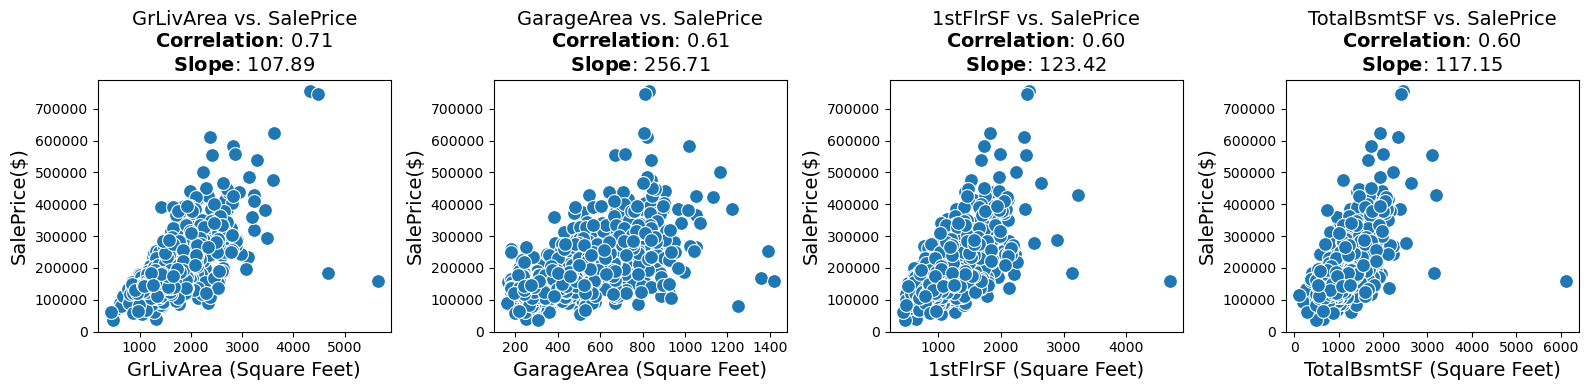

In [206]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes = axes.flatten()
i = 0
for col in ['GrLivArea', 'GarageArea', '1stFlrSF', 'TotalBsmtSF']:
    sns.scatterplot(x=df_train[col], y=df_train['SalePrice'], ax=axes[i], s=100)

    corr = corr_matrix.loc[col, 'SalePrice']
    slope = corr * (df_train['SalePrice'].std()/df_train[col].std())

    axes[i].set_title(
        rf"{col} vs. SalePrice"
        "\n"
        r"$\bf{Correlation}$" + f": {corr:.2f}\n"
        r"$\bf{Slope}$" + f": {slope:.2f}", 
        fontsize=14
        )
    
    axes[i].set_ylabel('SalePrice($)', fontsize=14)
    if col == 'GrLivArea':
        axes[i].set_xlabel(f'{col} (Square Feet)', fontsize=14)
    elif col == 'GarageArea':
        axes[i].set_xlabel(f'{col} (Square Feet)', fontsize=14)
    elif col == '1stFlrSF':
        axes[i].set_xlabel(f'{col} (Square Feet)', fontsize=14)
    elif col == 'TotalBsmtSF':
        axes[i].set_xlabel(f'{col} (Square Feet)', fontsize=14)
    i += 1

plt.tight_layout()
# plt.savefig('Scatterplots of SalePrice with its most correlated Features.jpg')
plt.show()

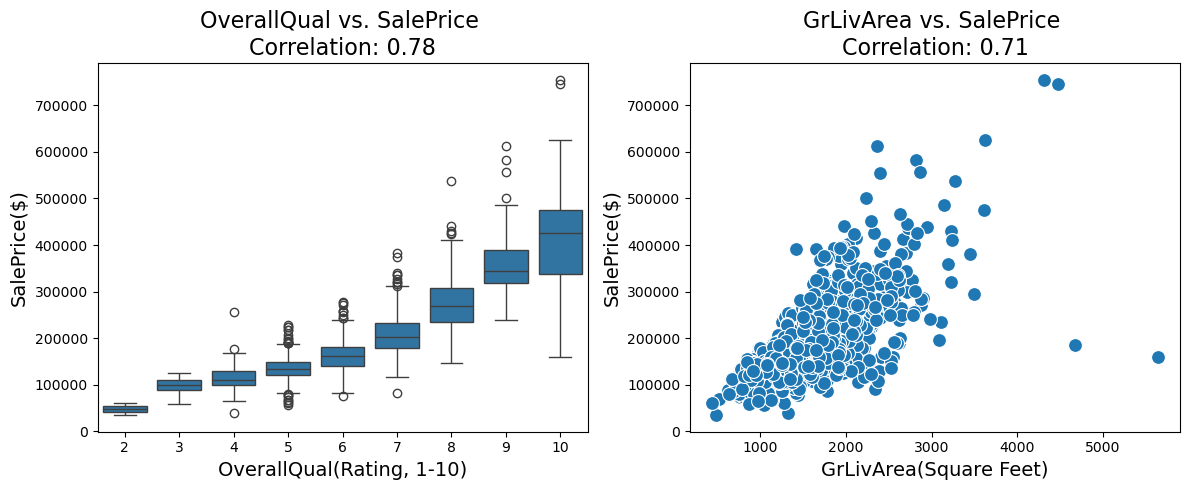

In [207]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df_train['OverallQual'], y=df_train['SalePrice'], ax=axes[0])
axes[0].set_title(f"OverallQual vs. SalePrice \nCorrelation: {corr_matrix.loc['OverallQual', 'SalePrice']:.2f}", fontsize=16)
axes[0].set_ylabel('SalePrice($)', fontsize=14)
axes[0].set_xlabel('OverallQual(Rating, 1-10)', fontsize=14)

sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], ax=axes[1], s=100)
axes[1].set_title(f"GrLivArea vs. SalePrice \nCorrelation: {corr_matrix.loc['GrLivArea', 'SalePrice']:.2f}", fontsize=16)
axes[1].set_ylabel('SalePrice($)', fontsize=14)
axes[1].set_xlabel('GrLivArea(Square Feet)', fontsize=14)

figures_dir = "figures"
os.makedirs(figures_dir, exist_ok=True)

plt.savefig(os.path.join(figures_dir,'Two_relationship_with_SalePrice.jpg'), dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()


# 5. Save Datasets

In [209]:
# Save the two datasets
# import os

# current_dir = os.getcwd()
# df_train.to_csv(os.path.join(current_dir, "df_train_cleaned.csv"), index=False)
# df_test.to_csv(os.path.join(current_dir, "df_test_cleaned.csv"), index=False)


# 6. Summary

### 1. Remove missing values that account for less than 5% of the total records, as well as those in five garage-related variables—GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond—which, despite accounting for slightly more than 5% (but less than 6%) of the total records, exhibit a consistent missing pattern within the same group of records. These two steps result in the removal of 122 records (8.4% of the total) from the training dataset. LotFrontage has 18% missing values in training dataset. Its missing values were imputed using predictions based on its correlated variable, 1stFlrSF. 

### 2. For all categorical variables with multiple rare categories, these categories were combined into a single category.

### 3. Four categorical variables—Street, Utilities, Heating, and Condition2, and four numerical variables--PoolArea, 3SsnPorch, LowQualFinSF, BsmtHalfBath were dropped from both datasets due to their highly skewed distribution and minimal impact on SalePrice. 

### 4. Among the 32 categorical variables, 10 with a clear ranking were converted to numeric values using ordinal encoding, CentralAir was binary encoded, and the remaining variables were transformed using one-hot encoding. Consequently, the training dataset now contains 1338 records with 151 columns, while the testing dataset consists of 1459 records with 150 columns. 

### 5. Visualizing the relationships between variables reveals that the following variables are highly correlated with the target variable, SalePrice (absolute value of the correlation coefficient, |r| > 0.5): 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars', 'GarageArea'. 